# Plot ldsc results

In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(fs)
})

In [2]:
setwd("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/subclass_regional_ldsc_v3/")

In [3]:
region_order <- c("A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C")

In [15]:
non_re_traits <- c(
    "Arvanitis.NatCommun.2019.Heart_Failure",
    "Astle.Cell.2016.Basophil_count",
    "Astle.Cell.2016.Eosinophil_count",
    "Astle.Cell.2016.Lymphocyte_count",
    "Astle.Cell.2016.Monocyte_count",
    "Astle.Cell.2016.Neutrophil_count",
    "Aylward.2018.biorxiv.Type_1_Diabetes",
    "Barban.NatGenet.2016.Age_First_Birth",
    "Barban.NatGenet.2016.Number_Children_Born",
    "Bentham.NatGenet.2015.Lupus",
    "Bentham.NatGenet.2015.Systemic_lupus_erythematosus",
    "Bronson.NatGenet.2016.IgA_deficiency",
    "Chiou.Nature.2021.Type_1_diabetes",
    "Cordell.NatCommun.2015.Primary_Biliary_Cirrhosis",
    "Deary.MolPsychiatry.2017.Tiredness",
    "deLange.NatGenet.2017.Crohns_Disease",
    "deLange.NatGenet.2017.Inflammatory_Bowel_Disease",
    "deLange.NatGenet.2017.Ulcerative_Colitis",
    "Demenais.NatGenet.2018.Asthma",
    "Demontis.NatGenet.2019.Attention_Deficit_Hyperactivity_Disorder",
    "denHoed.NatGenet.2013.Heart_Rate",
    "Dubois.NatGenet.2010.Celiacs_Disease",
    "Duncan.AmJPsychiatry.2017.Anorexia_Nervosa",
    "Dupuis.NatGenet.2010.HOMA-B",
    "Dupuis.NatGenet.2010.HOMA-IR",
    "EAGLE.AmJMedGenet.2016.Childhood_Aggression",
    "EAGLE.NatGenet.2015.Atopic_Dermatitis",
    "Felix.HumMolGenet.2015.Childhood_BMI",
    "Ferreira.2019.AJHG.Asthma_child_onset",
    "Ferreira.NatGenet.2017.Allergy",
    "GLGC.NatGenet.2013.HDL_Cholesterol",
    "GLGC.NatGenet.2013.LDL_Cholesterol",
    "GLGC.NatGenet.2013.Total_Cholesterol",
    "GLGC.NatGenet.2013.Triglycerides",
    "Grove.NatGenet.2019.Autism_Spectrum_Disorder",
    "Hammerschlag.NatGenet.2017.Insomnia",
    # "Hoffmann.NatGenet.2018.HDL_cholesterol",
    # "Hoffmann.NatGenet.2018.LDL_cholesterol",
    # "Hoffmann.NatGenet.2018.Total_cholesterol",
    # "Hoffmann.NatGenet.2018.Triglycerides",
    "Horikoshi.Nature.2016.Birth_Weight",
    # "Hou.HumMolGenet.2016.Bipolar_Disorder",
    # "IMSGC.NatGenet.2011.Multiple_Sclerosis",
    "IMSGC.Science.2019.Multiple_sclerosis",
    "Jansen.2019.NatGenet.Insomnia",
    # "Jansen.NatGenet.2019.Alzheimers_disease",
    "Jansen.NatGenet.2019.Alzheimers_Disease",
    "Jiang.NatGenet.2018.Vitamin_D",
    "Ji.NatGenet.2017.Primary_Sclerosing_Cholangitis",
    "Jin.NatGenet.2016.Autoimmune_vitiligo",
    # "Jin.NatGenet.2016.Vitiligo",
    "Jones.PLOSGen.2016.Chronotype",
    "Jones.PLOSGen.2016.Sleep_Duration",
    "Kemp.NatGenet.2017.Heel_bone_mineral_density",
    "Kilpelainen.NatCommun.2016.Leptin",
    # "Lambert.NatGenet.2013.Alzheimers_Disease",
    # "Locke.Nature.2015.BMI",
    "Luciano.NatGenet.2017.Neuroticism",
    "Mahajan.NatGenet.2018.Type_2_Diabetes",
    "Malik.2018.NatGenet.Stroke",
    "Manning.NatGenet.2012.Fasting_Glucose",
    # "Manning.NatGenet.2012.Fasting_Glucose_adj_BMI",
    "Manning.NatGenet.2012.Fasting_Insulin",
    # "Manning.NatGenet.2012.Fasting_Insulin_adj_BMI",
    "Marinelli.Sleep.2016.Child_Sleep_Duration",
    "Michailidou.Nature.2017.Breast_cancer",
    "Namjou.BMCMed.2019.Nonalcoholic_fatty_liver_disease",
    "Nelson.NatGenet.2017.Coronary_Artery_Disease",
    "Nielson.2018.NatGenet.Atrial_Fibrillation",
    "Okada.Nature.2014.Rheumatoid_Arthritis",
    "Okbay.Nature.2016.Educational_Attainment",
    "Pattaro.NatCommun.2016.Chronic_Kidney_Disease",
    "PGC.MolPsychiatry.2017.Obsessive_Compulsive_Disorder",
    "PGC.MolPsychiatry.2017.Post_Traumatic_Stress_Disorder",
    "PGC.Nature.2014.Schizophrenia",
    "ReproGen.NatGenet.2015.Age_At_Menopause",
    "ReproGen.NatGenet.2017.Age_At_Menarche",
    "SAIGE.UKBB.2018.Tobacco_use_disorder",
    "Sakornsakolpat.NatGenet.2019.Chronic_obstructive_pulmonary_disease",
    "Savage.NatGenet.2018.Intelligence",
    # "Saxena.NatGenet.2010.2hr_Glucose_adjBMI",
    "Schafmayer.Gut.2019.Diverticular_disease",
    "Schumann.PNAS.2016.Alcohol_Usage",
    # "Shadrina.PLoSGenet.2019.Varicose_veins",
    # "Shrine.NatGenet.2019.FEV1_FVC_ratio",
    # "Shrine.NatGenet.2019.Forced_expiration_volume",
    # "Shrine.NatGenet.2019.Forced_vital_capacity",
    # "Shrine.NatGenet.2019.Peak_expiratory_flow",
    # "Sniekers.NatGenet.2017.Intelligence",
    "Stahl.2018.biorxiv.Bipolar_Disorder",
    "Strawbridge.Diabetes.2011.Fasting_ProInsulin",
    "Taal.NatGenet.2012.Head_Circumference",
    "Tachmazidou.NatGenet.2019.Osteoarthritis",
    "Teumer.Diabetes.2016.Microalbuminuria",
    "Teumer.NatCommun.2018.Thyroid_stimulating_hormone",
    "Tin.NatGenet.2019.Gout",
    # "Tin.NatGenet.2019.Serum_urate",
    "UKB.Neale_v2.2018.Body_mass_index",
    "UKB.Neale_v2.2018.Standing_height",
    # "UKB.Neale_v2.2018.Vitamin_D",
    # "vandenBerg.BehavGenet.2016.Extraversion",
    "vanderValk.HumMolGenet.2014.Birth_Length",
    "vanRheenen.NatGenet.2016.Amyotrophic_Lateral_Sclerosis",
    # "Watanabe.NatGenet.2019.Diastolic_blood_pressure",
    # "Watanabe.NatGenet.2019.Pulse_rate",
    # "Watanabe.NatGenet.2019.Systolic_blood_pressure",
    "Watson.2018.NatGenet.Anorexia_Nervosa",
    # "Wheeler.PlosMed.2017.HbA1c",
    # "Wiberg.NatCommun.2019.Carpal_tunnel_syndrome",
    "Wray.biorxiv.2018.Major_Depressive_Disorder",
    "Wuttke.NatGenet.2019.Blood_urea_nitrogen",
    "Wuttke.NatGenet.2019.Chronic_kidney_disease",
    # "Wuttke.NatGenet.2019.eGFR",
    # "Wuttke.NatGenet.2019.Serum_creatinine",
    # "Yengo.biorxiv.2018.BMI",
    "Yengo.biorxiv.2018.Height",
    "Zhu.RespirRes.2019.Hypertension"
)

In [34]:
traits <- c()
included_subclasses <- c(
    "L2_3_IT", "L4_IT", "L5_IT", "L6_IT", "LAMP5", "PVALB", "SST"
)
for (subclass_dir in included_subclasses) {
    if (subclass_dir == "baseset") {
        next
    }
    ldsc_table <- read.table(sprintf("%s/ldsc_aggregate.tsv", subclass_dir), header = TRUE, sep = "\t")
    tmp <- ldsc_table |>
        dplyr::group_by(phenotype) |>
        dplyr::summarise(any_below_0.05 = any(pvalue < 0.01)) |>
        dplyr::filter(any_below_0.05)
    traits <- c(traits, tmp$phenotype)
}
traits <- unique(traits)
traits <- traits[traits %in% non_re_traits]

In [35]:
subclass <- "L6_IT"
ldsc_table <- read.table(sprintf("%s/ldsc_aggregate.tsv", subclass), header = TRUE, sep = '\t')
ldsc_table <- ldsc_table |>
    dplyr::filter((phenotype %in% traits)) |>
    dplyr::mutate(subclass = factor(subclass, levels = rev(region_order))) |>
    dplyr::mutate(qvalue = p.adjust(pvalue, method = 'fdr')) |>
    dplyr::mutate(phenotype = factor(phenotype)) |>
    dplyr::mutate(significant_or_not = pvalue < 0.05) |>
    dplyr::mutate(enrichment_score = coefficient / coefficient_ste) |>
    dplyr::mutate(stars = if_else(pvalue < 0.001, '**', if_else(pvalue < 0.01, '*', '')))
ldsc_table_enrichment <- ldsc_table[, c("phenotype", "enrichment_score", "subclass")]
ldsc_table_enrichment_matrix <- ldsc_table_enrichment |>
    tidyr::pivot_wider(id_cols = phenotype, names_from = subclass, values_from = enrichment_score)
n_cols <- ncol(ldsc_table_enrichment_matrix)
hclust_matrix <- as.matrix(ldsc_table_enrichment_matrix[, 2:n_cols])
rownames(hclust_matrix) <- as.data.frame(ldsc_table_enrichment_matrix)[, 1]
rowHclust <- hclust(dist(hclust_matrix))
ldsc_table_plot <- ldsc_table
ldsc_table_plot$phenotype <- factor(
    ldsc_table_plot$phenotype, levels = rownames(hclust_matrix)[rowHclust$order])
ldsc_table_plot$phenotype <- droplevels(ldsc_table_plot$phenotype)

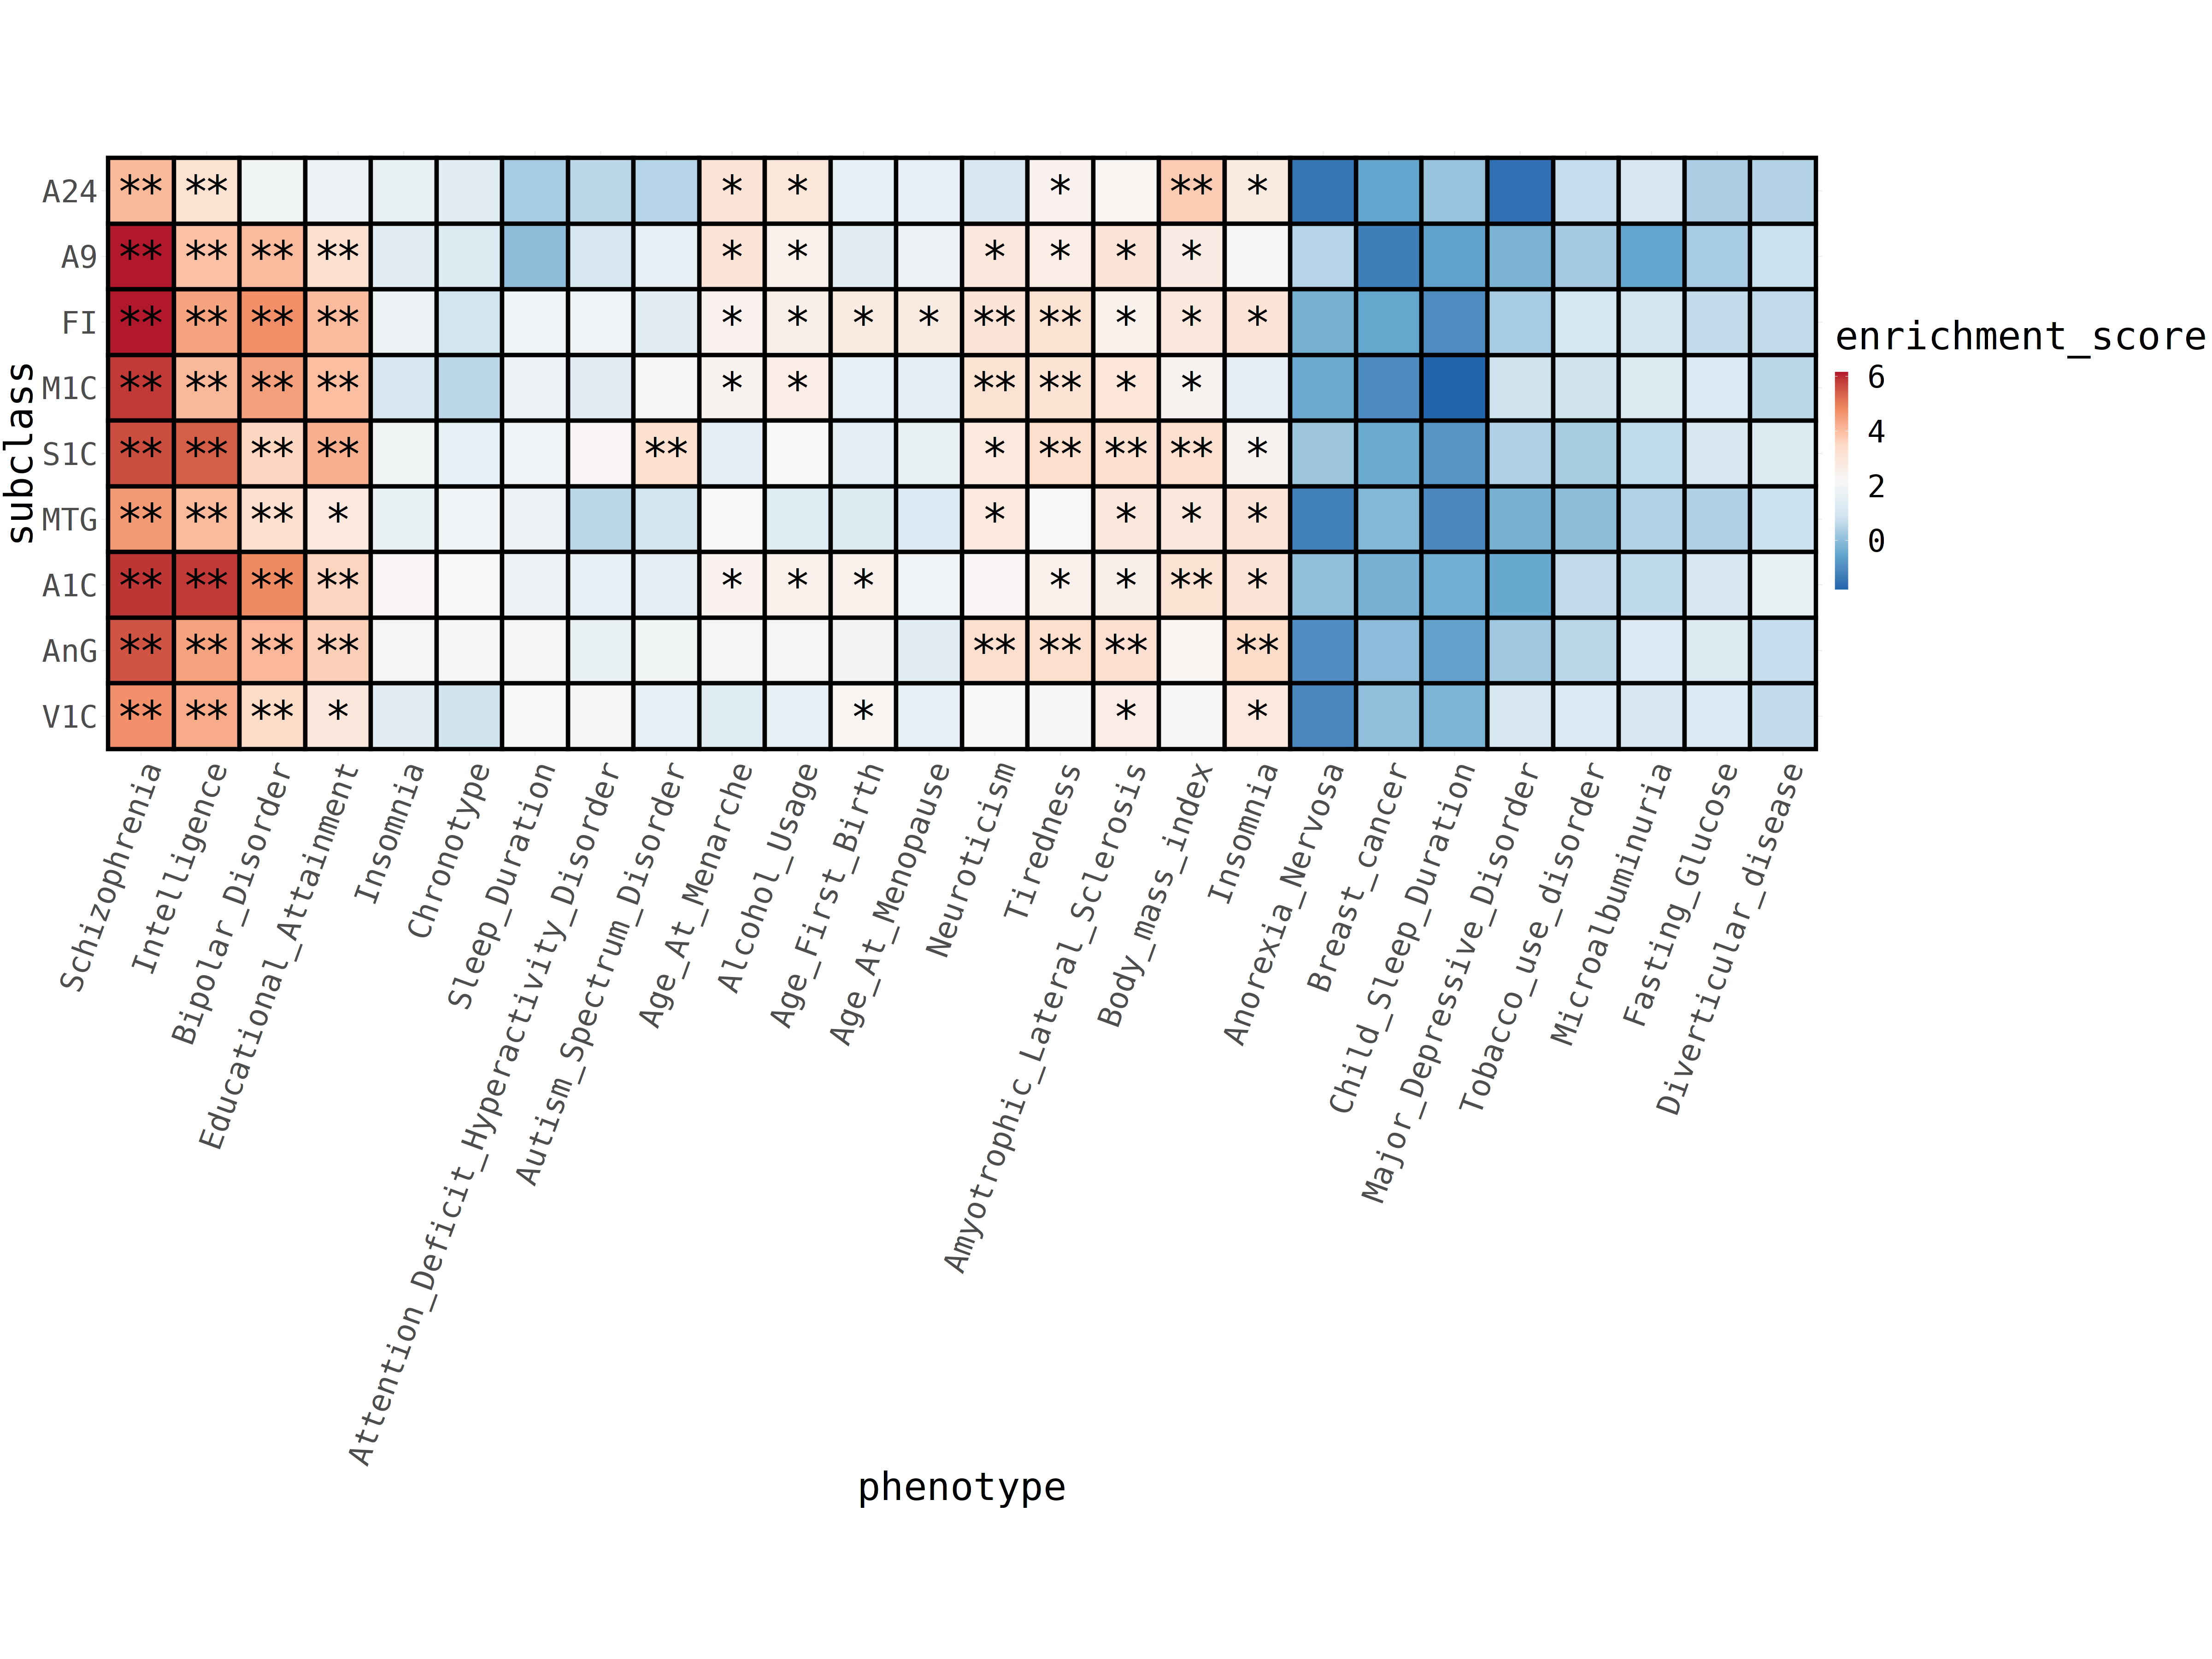

In [36]:
options(repr.plot.width = 40, repr.plot.height = 30)
plot <- ggplot(ldsc_table_plot, aes(x = phenotype, y = subclass, fill = enrichment_score, label = stars)) +
    geom_tile(color = "black", linewidth = 2) +
    geom_text(size = 20) +
    scale_fill_distiller(palette = "RdBu") + 
    coord_equal() +
    theme_minimal() +
    theme(
        text = element_text(family = "mono", size = 50),
        axis.text.x = element_text(hjust = 1, angle = 70),
        # axis.text.y = element_text(size = 40),
        # axis.title.x = element_text(size = 50),
        # axis.title.y = element_text(size = 50),
        legend.key.height = unit(2, "cm"),
        # legend.text = element_text(size = 40),
        # legend.title = element_text(size = 50)
    ) +
    scale_x_discrete(label = sapply(strsplit(levels(ldsc_table_plot$phenotype), split = "[.]"), tail, 1))
plot
ggsave(
    filename = sprintf("%s/%s-ldsc.pdf", figure_dir, subclass), 
    plot = plot, 
    dpi = 300, 
    width = 40, 
    height = 30, 
    device = "pdf"
)

In [17]:
subclass <- "L4_IT"
ldsc_table <- read.table(sprintf("%s/ldsc_aggregate.tsv", subclass), header = TRUE, sep = '\t')
ldsc_table <- ldsc_table |>
    dplyr::filter((phenotype %in% traits)) |>
    dplyr::mutate(subclass = factor(subclass, levels = rev(region_order))) |>
    dplyr::mutate(qvalue = p.adjust(pvalue, method = 'fdr')) |>
    dplyr::mutate(phenotype = factor(phenotype)) |>
    dplyr::mutate(significant_or_not = pvalue < 0.05) |>
    dplyr::mutate(enrichment_score = coefficient / coefficient_ste) |>
    dplyr::mutate(stars = if_else(pvalue < 0.001, '**', if_else(pvalue < 0.01, '*', '')))
ldsc_table_enrichment <- ldsc_table[, c("phenotype", "enrichment_score", "subclass")]
ldsc_table_enrichment_matrix <- ldsc_table_enrichment |>
    tidyr::pivot_wider(id_cols = phenotype, names_from = subclass, values_from = enrichment_score)
n_cols <- ncol(ldsc_table_enrichment_matrix)
hclust_matrix <- as.matrix(ldsc_table_enrichment_matrix[, 2:n_cols])
rownames(hclust_matrix) <- as.data.frame(ldsc_table_enrichment_matrix)[, 1]
rowHclust <- hclust(dist(hclust_matrix))
ldsc_table_plot <- ldsc_table
ldsc_table_plot$phenotype <- factor(
    ldsc_table_plot$phenotype, levels = rownames(hclust_matrix)[rowHclust$order])
ldsc_table_plot$phenotype <- droplevels(ldsc_table_plot$phenotype)

In [18]:
figure_dir <- "/tscc/projects/ps-epigen/users/biy022/biccn/analysis/final_figures/"

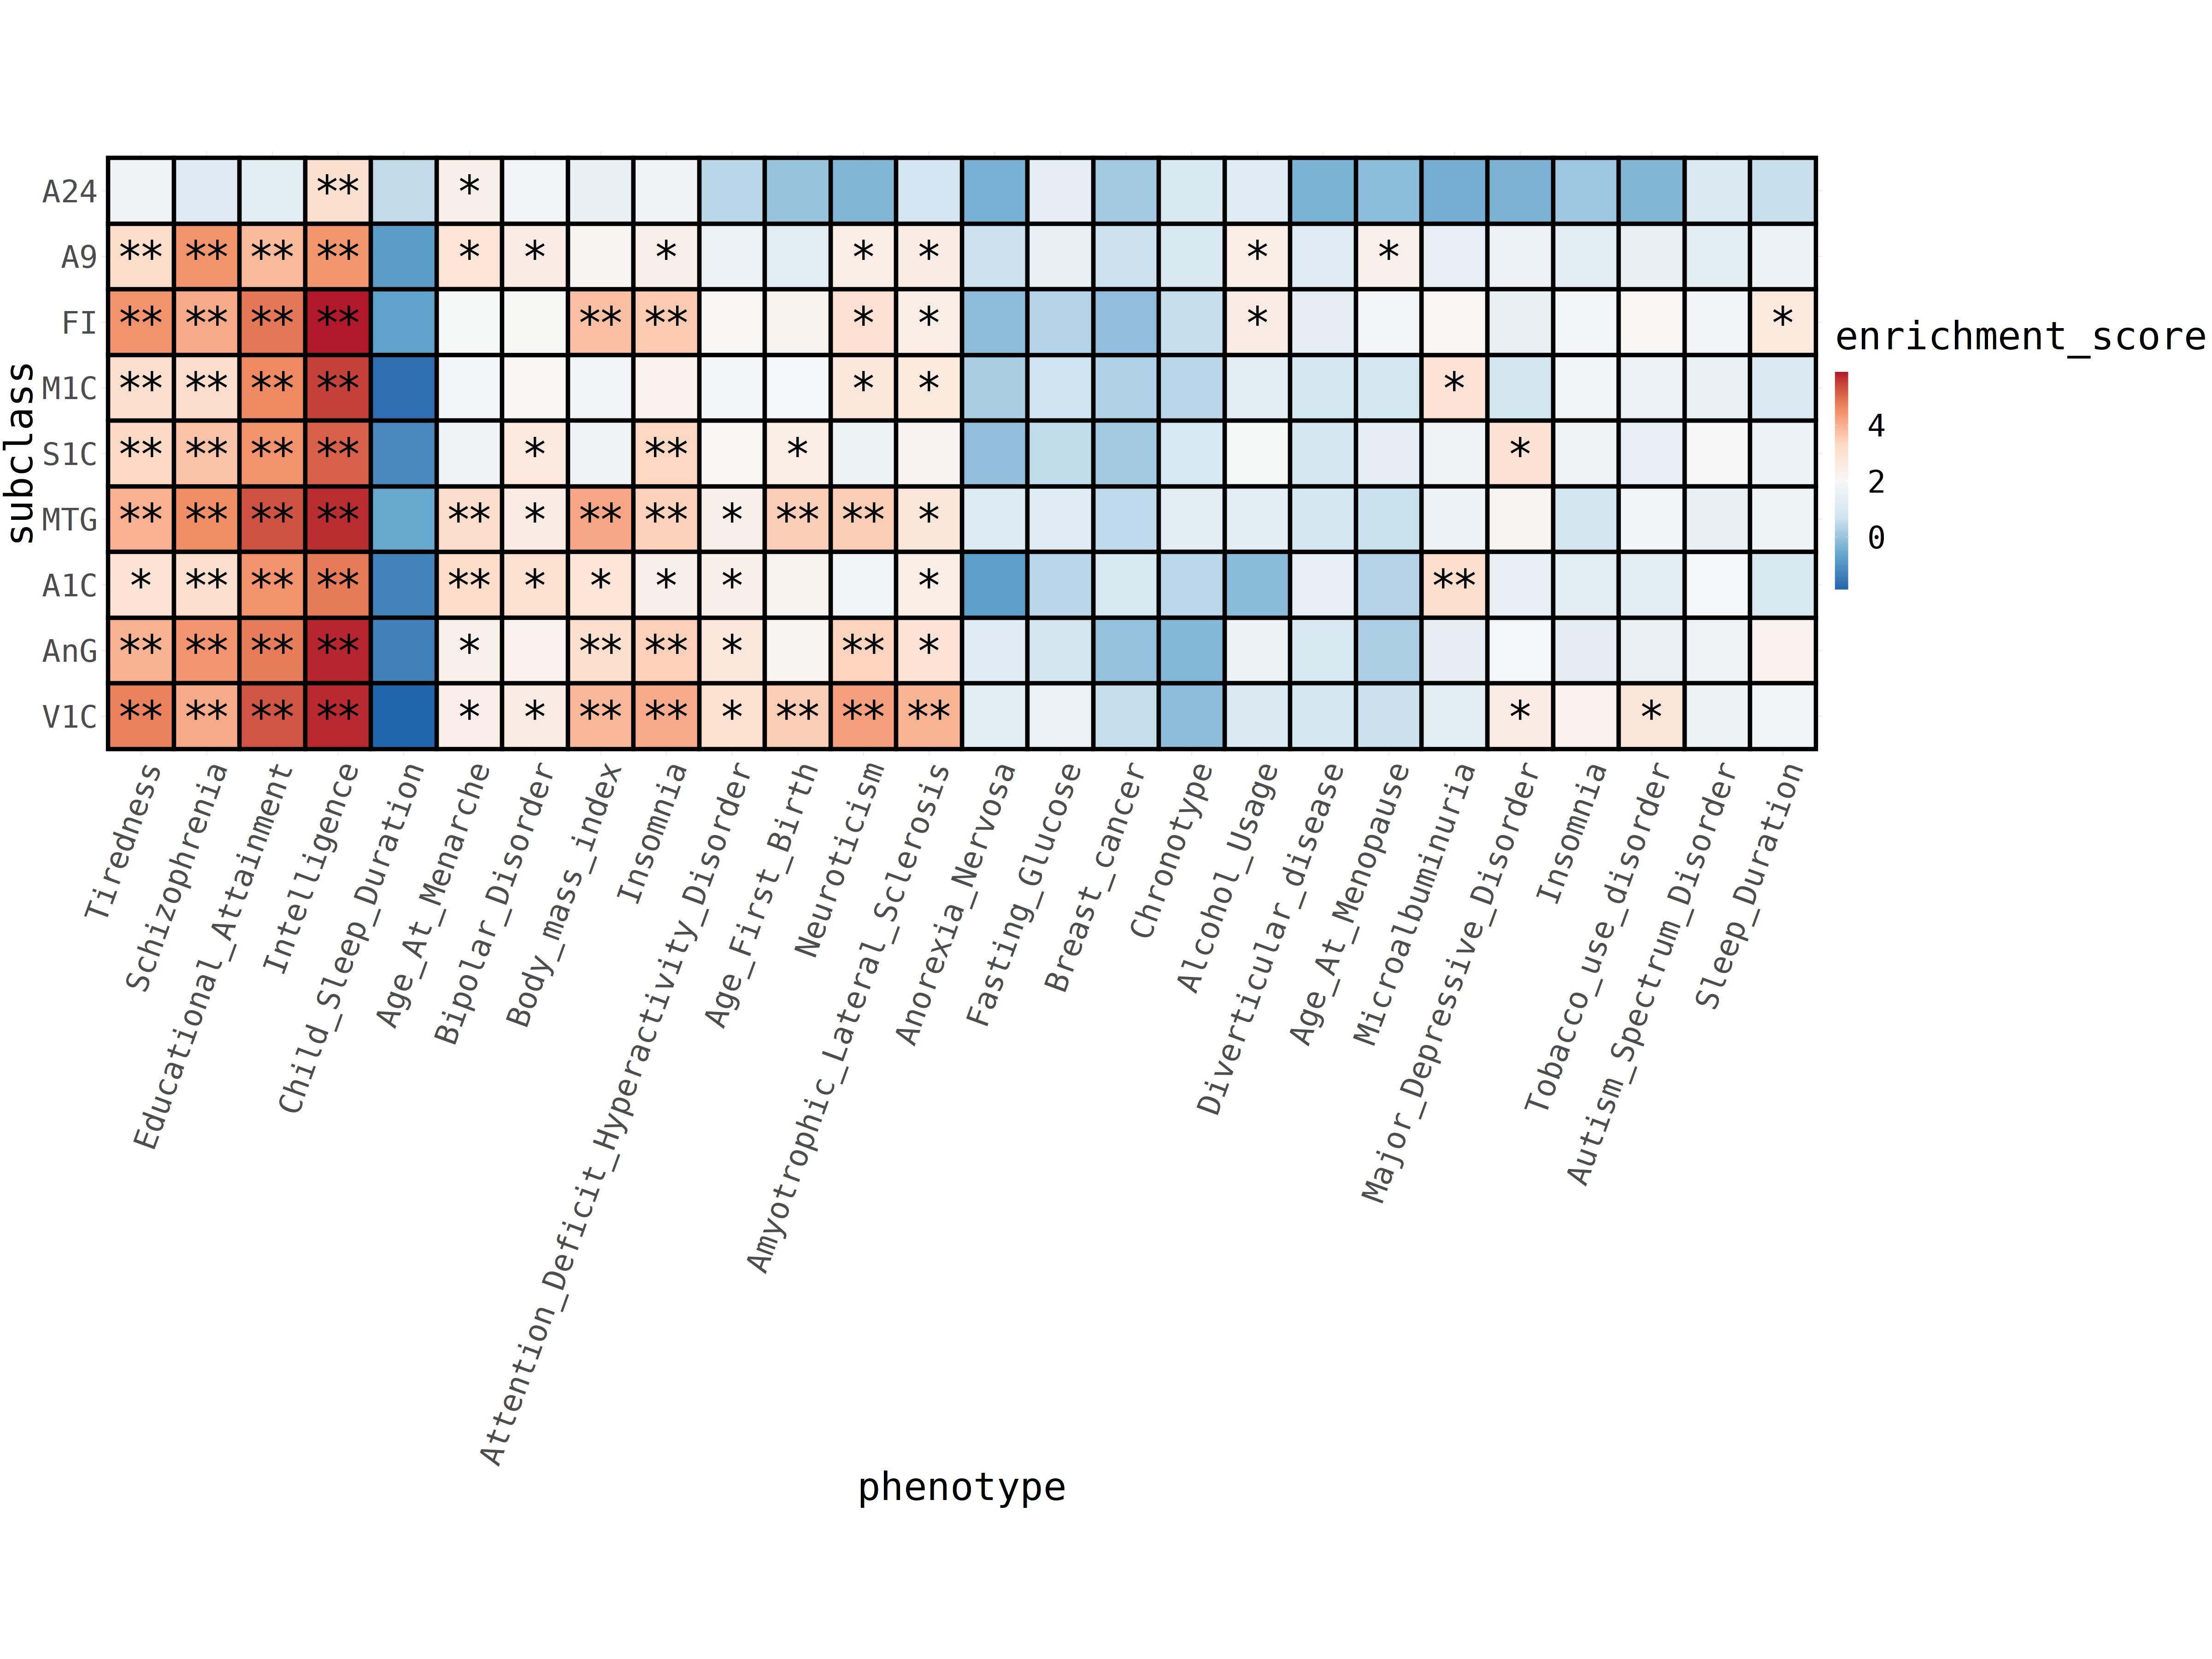

In [19]:
options(repr.plot.width = 40, repr.plot.height = 30)
plot <- ggplot(ldsc_table_plot, aes(x = phenotype, y = subclass, fill = enrichment_score, label = stars)) +
    geom_tile(color = "black", linewidth = 2) +
    geom_text(size = 20) +
    scale_fill_distiller(palette = "RdBu") + 
    coord_equal() +
    theme_minimal() +
    theme(
        text = element_text(family = "mono", size = 50),
        axis.text.x = element_text(hjust = 1, angle = 70),
        # axis.text.y = element_text(size = 40),
        # axis.title.x = element_text(size = 50),
        # axis.title.y = element_text(size = 50),
        legend.key.height = unit(2, "cm"),
        # legend.text = element_text(size = 40),
        # legend.title = element_text(size = 50)
    ) +
    scale_x_discrete(label = sapply(strsplit(levels(ldsc_table_plot$phenotype), split = "[.]"), tail, 1))
plot
ggsave(
    filename = sprintf("%s/%s-ldsc.pdf", figure_dir, subclass), 
    plot = plot, 
    dpi = 300, 
    width = 40, 
    height = 30, 
    device = "pdf"
)

In [20]:
subclass <- "PVALB"
ldsc_table <- read.table(sprintf("%s/ldsc_aggregate.tsv", subclass), header = TRUE, sep = '\t')
ldsc_table <- ldsc_table |>
    dplyr::filter((phenotype %in% traits)) |>
    dplyr::mutate(subclass = factor(subclass, levels = rev(region_order))) |>
    dplyr::mutate(qvalue = p.adjust(pvalue, method = 'fdr')) |>
    dplyr::mutate(phenotype = factor(phenotype)) |>
    dplyr::mutate(significant_or_not = pvalue < 0.05) |>
    dplyr::mutate(enrichment_score = coefficient / coefficient_ste) |>
    dplyr::mutate(stars = if_else(pvalue < 0.001, '**', if_else(pvalue < 0.01, '*', '')))
ldsc_table_enrichment <- ldsc_table[, c("phenotype", "enrichment_score", "subclass")]
ldsc_table_enrichment_matrix <- ldsc_table_enrichment |>
    tidyr::pivot_wider(id_cols = phenotype, names_from = subclass, values_from = enrichment_score)
n_cols <- ncol(ldsc_table_enrichment_matrix)
hclust_matrix <- as.matrix(ldsc_table_enrichment_matrix[, 2:n_cols])
rownames(hclust_matrix) <- as.data.frame(ldsc_table_enrichment_matrix)[, 1]
rowHclust <- hclust(dist(hclust_matrix))
ldsc_table_plot <- ldsc_table
ldsc_table_plot$phenotype <- factor(
    ldsc_table_plot$phenotype, levels = rownames(hclust_matrix)[rowHclust$order])
ldsc_table_plot$phenotype <- droplevels(ldsc_table_plot$phenotype)

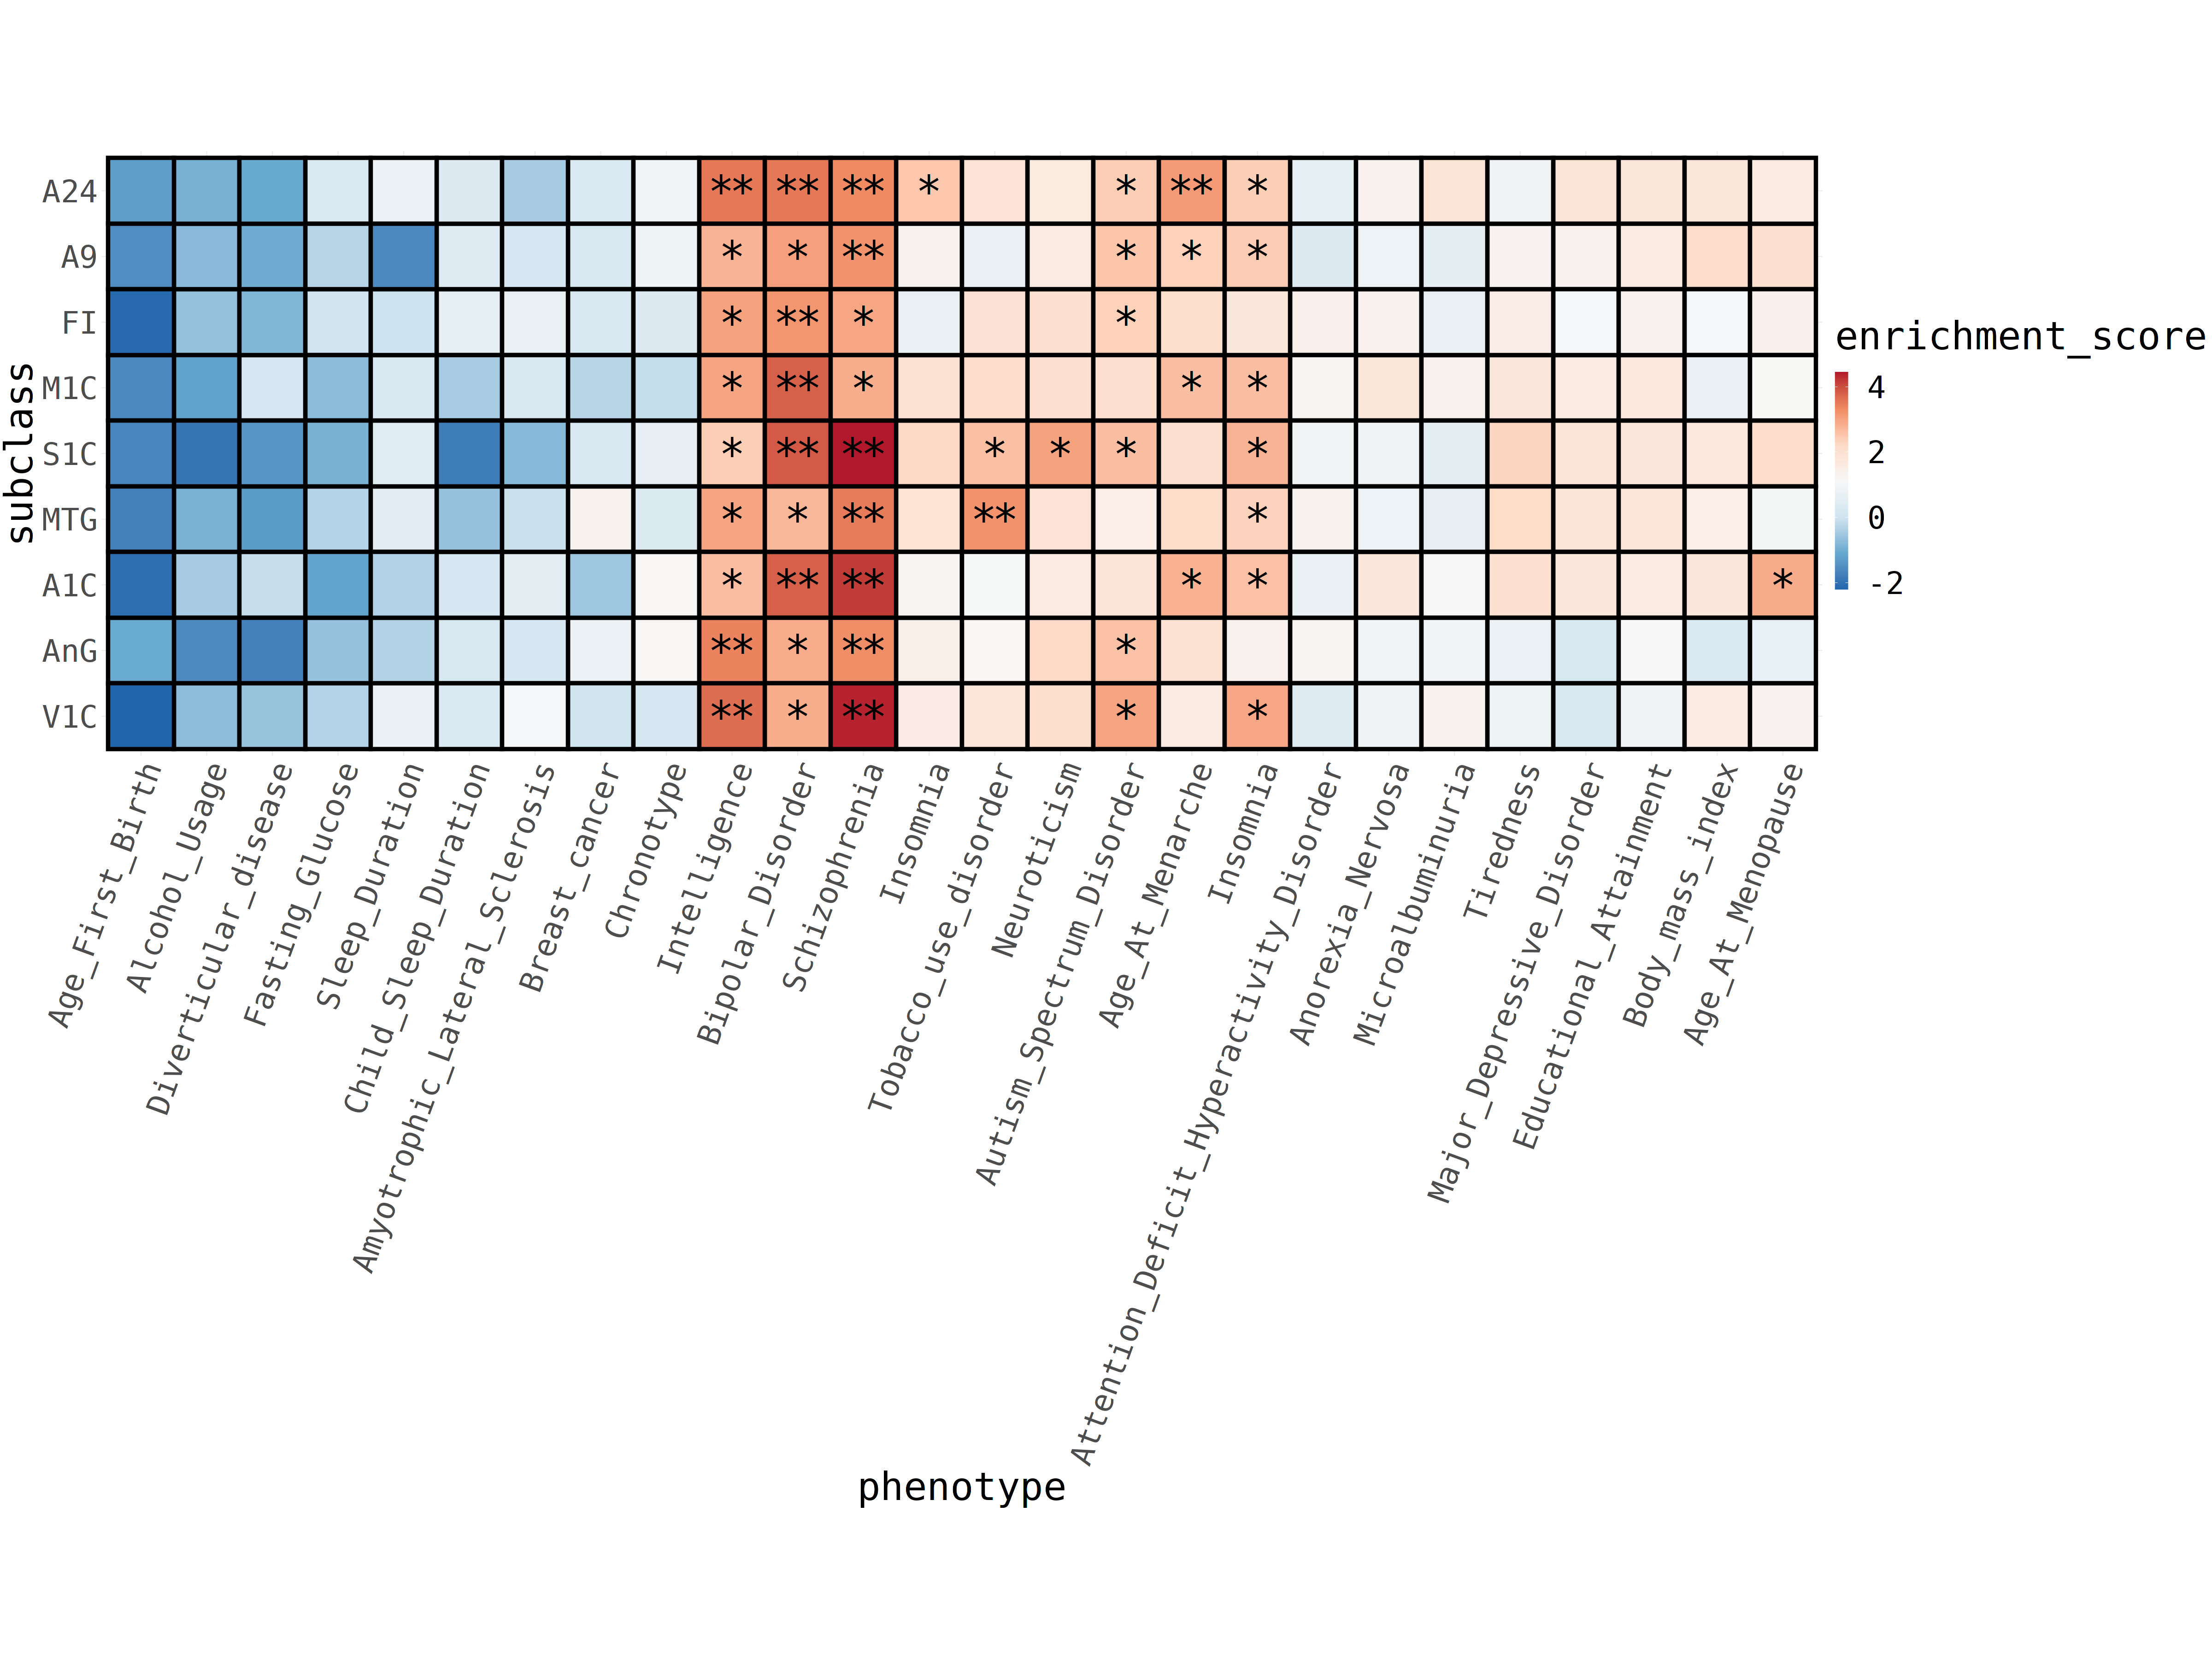

In [22]:
options(repr.plot.width = 40, repr.plot.height = 30)
plot <- ggplot(ldsc_table_plot, aes(x = phenotype, y = subclass, fill = enrichment_score, label = stars)) +
    geom_tile(color = "black", linewidth = 2) +
    geom_text(size = 20) +
    scale_fill_distiller(palette = "RdBu") + 
    coord_equal() +
    theme_minimal() +
    theme(
        text = element_text(family = "mono", size = 50),
        axis.text.x = element_text(hjust = 1, angle = 70),
        # axis.text.y = element_text(size = 40),
        # axis.title.x = element_text(size = 50),
        # axis.title.y = element_text(size = 50),
        legend.key.height = unit(2, "cm"),
        # legend.text = element_text(size = 40),
        # legend.title = element_text(size = 50)
    ) +
    scale_x_discrete(label = sapply(strsplit(levels(ldsc_table_plot$phenotype), split = "[.]"), tail, 1))
plot
ggsave(
    filename = sprintf("%s/%s-ldsc.pdf", figure_dir, subclass), 
    plot = plot, 
    dpi = 300, 
    width = 40, 
    height = 30, 
    device = "pdf"
)

In [23]:
subclass <- "L2_3_IT"
ldsc_table <- read.table(sprintf("%s/ldsc_aggregate.tsv", subclass), header = TRUE, sep = '\t')
ldsc_table <- ldsc_table |>
    dplyr::filter((phenotype %in% traits)) |>
    dplyr::mutate(subclass = factor(subclass, levels = rev(region_order))) |>
    dplyr::mutate(qvalue = p.adjust(pvalue, method = 'fdr')) |>
    dplyr::mutate(phenotype = factor(phenotype)) |>
    dplyr::mutate(significant_or_not = pvalue < 0.05) |>
    dplyr::mutate(enrichment_score = coefficient / coefficient_ste) |>
    dplyr::mutate(stars = if_else(pvalue < 0.001, '**', if_else(pvalue < 0.01, '*', '')))
ldsc_table_enrichment <- ldsc_table[, c("phenotype", "enrichment_score", "subclass")]
ldsc_table_enrichment_matrix <- ldsc_table_enrichment |>
    tidyr::pivot_wider(id_cols = phenotype, names_from = subclass, values_from = enrichment_score)
n_cols <- ncol(ldsc_table_enrichment_matrix)
hclust_matrix <- as.matrix(ldsc_table_enrichment_matrix[, 2:n_cols])
rownames(hclust_matrix) <- as.data.frame(ldsc_table_enrichment_matrix)[, 1]
rowHclust <- hclust(dist(hclust_matrix))
ldsc_table_plot <- ldsc_table
ldsc_table_plot$phenotype <- factor(
    ldsc_table_plot$phenotype, levels = rownames(hclust_matrix)[rowHclust$order])
ldsc_table_plot$phenotype <- droplevels(ldsc_table_plot$phenotype)

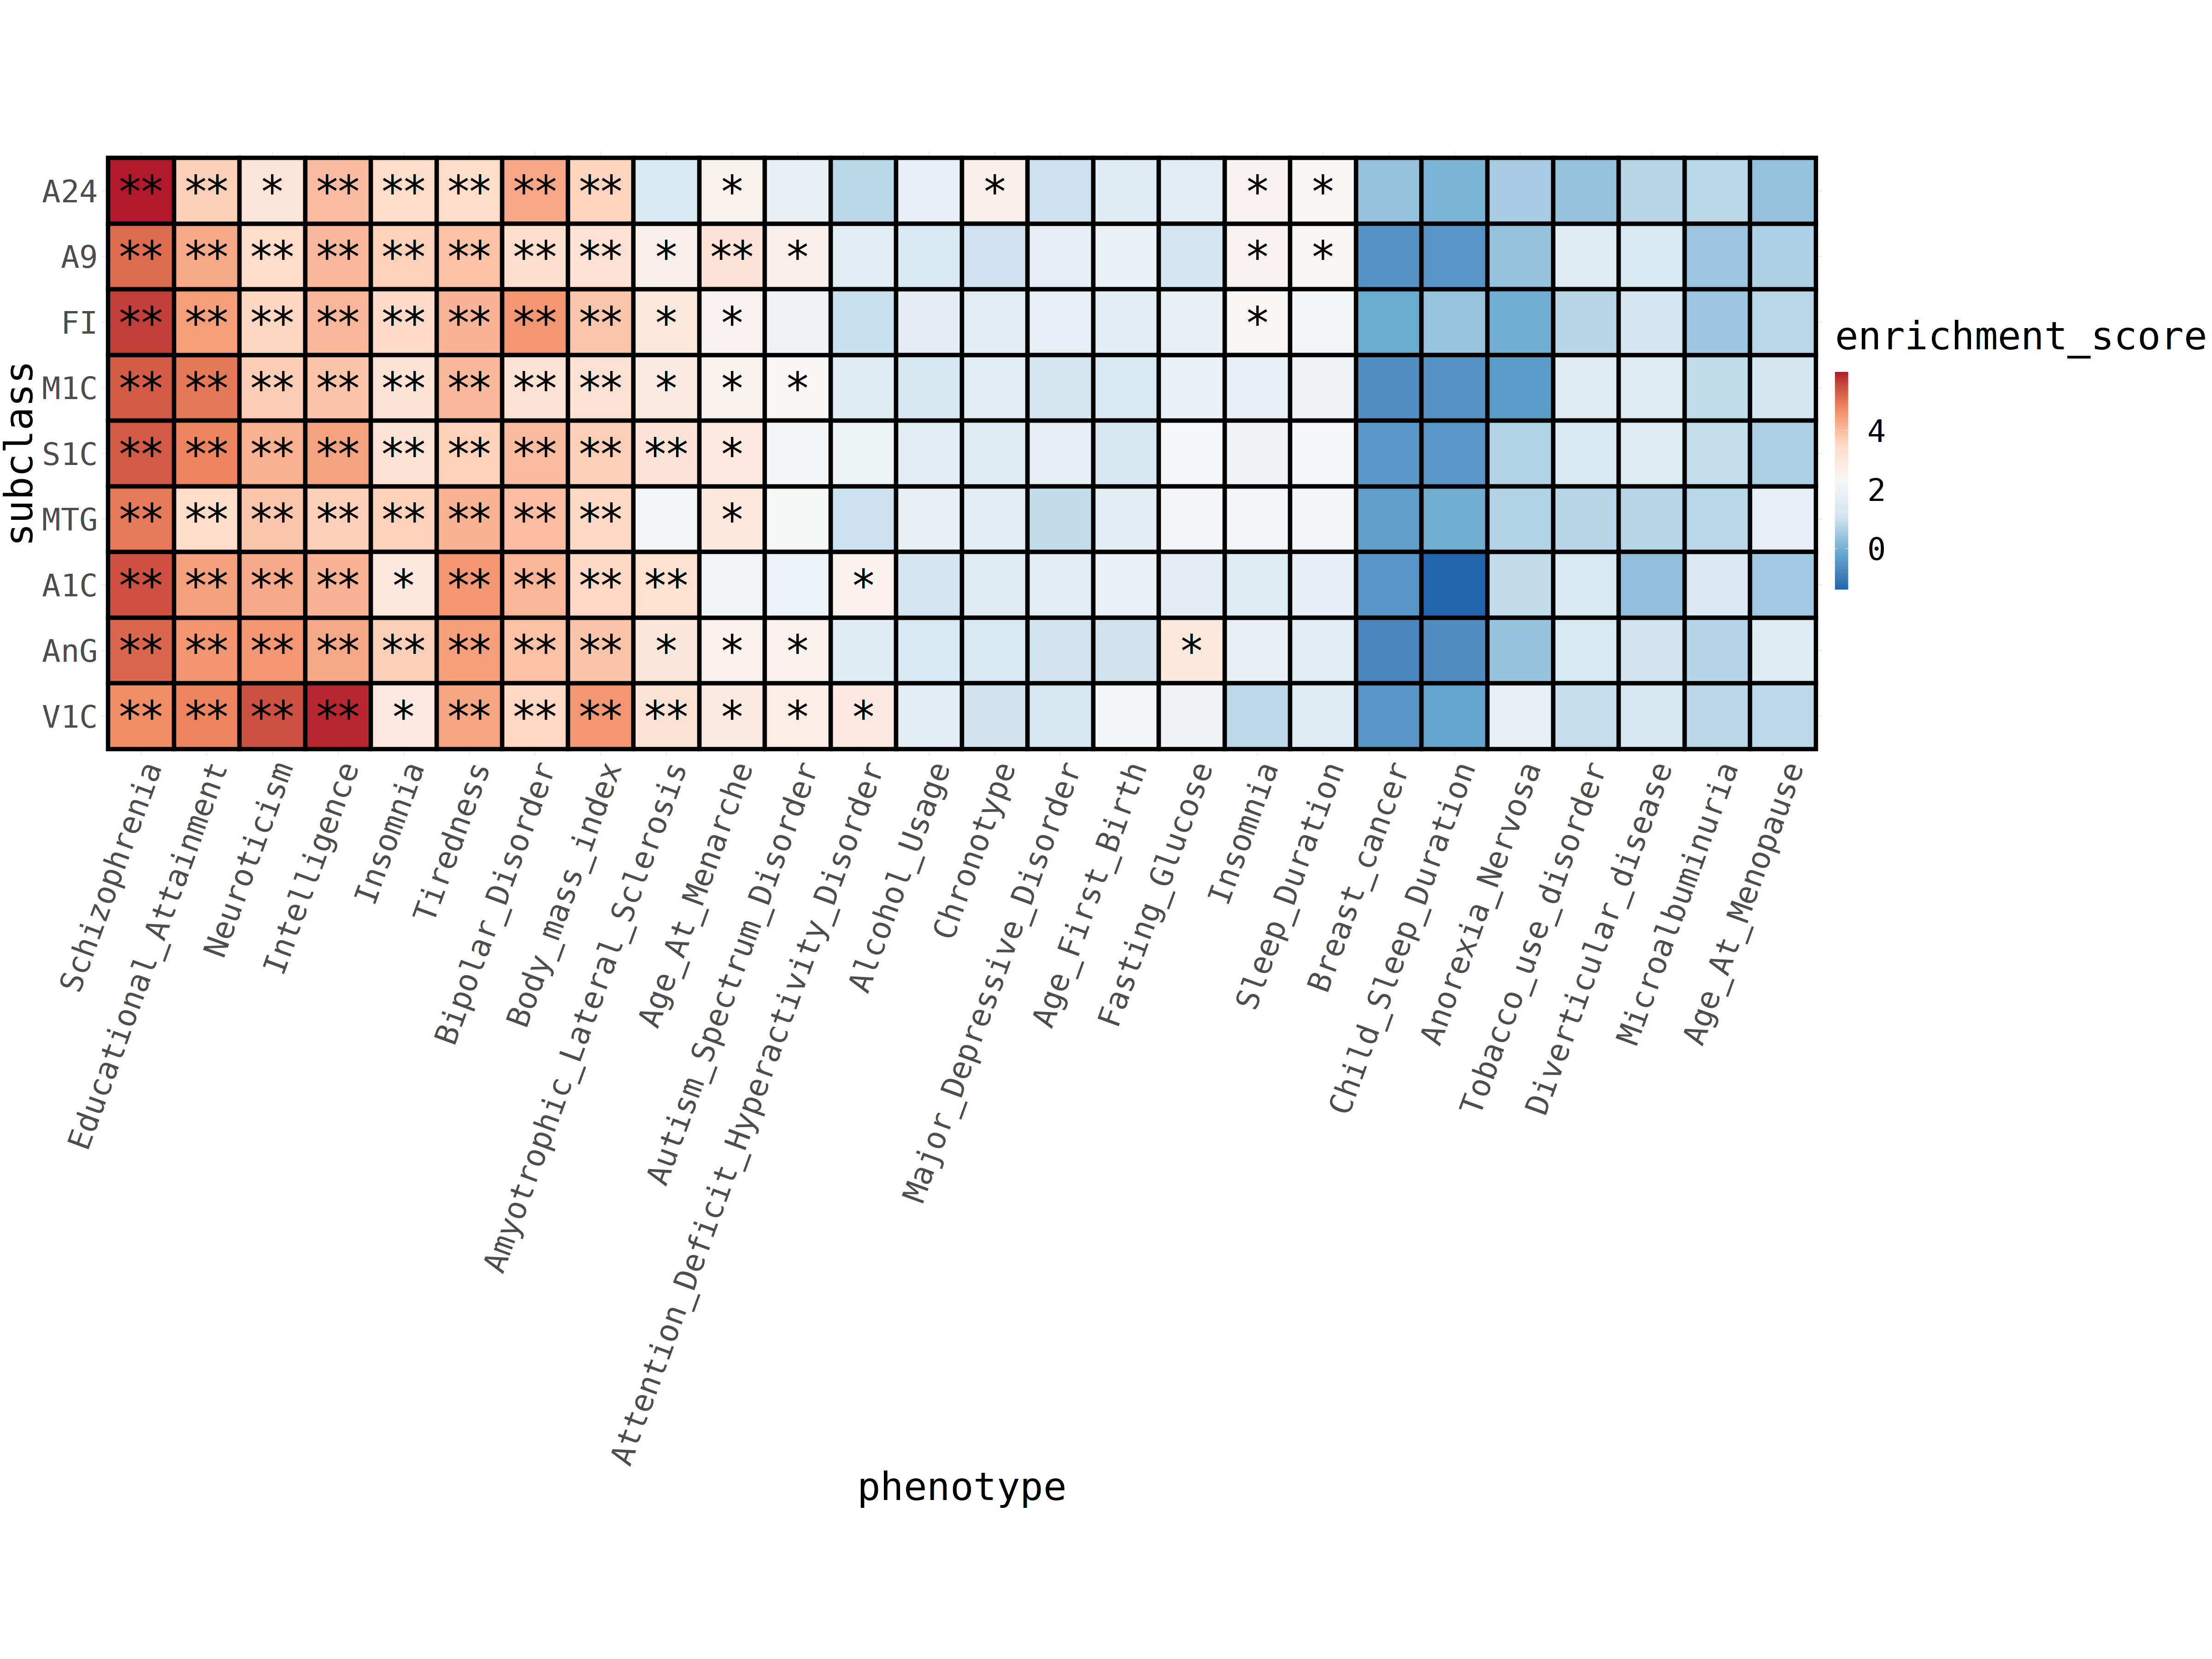

In [24]:
options(repr.plot.width = 40, repr.plot.height = 30)
plot <- ggplot(ldsc_table_plot, aes(x = phenotype, y = subclass, fill = enrichment_score, label = stars)) +
    geom_tile(color = "black", linewidth = 2) +
    geom_text(size = 20) +
    scale_fill_distiller(palette = "RdBu") + 
    coord_equal() +
    theme_minimal() +
    theme(
        text = element_text(family = "mono", size = 50),
        axis.text.x = element_text(hjust = 1, angle = 70),
        # axis.text.y = element_text(size = 40),
        # axis.title.x = element_text(size = 50),
        # axis.title.y = element_text(size = 50),
        legend.key.height = unit(2, "cm"),
        # legend.text = element_text(size = 40),
        # legend.title = element_text(size = 50)
    ) +
    scale_x_discrete(label = sapply(strsplit(levels(ldsc_table_plot$phenotype), split = "[.]"), tail, 1))
plot
ggsave(
    filename = sprintf("%s/%s-ldsc.pdf", figure_dir, subclass), 
    plot = plot, 
    dpi = 300, 
    width = 40, 
    height = 30, 
    device = "pdf"
)

In [25]:
subclass <- "L5_IT"
ldsc_table <- read.table(sprintf("%s/ldsc_aggregate.tsv", subclass), header = TRUE, sep = '\t')
ldsc_table <- ldsc_table |>
    dplyr::filter((phenotype %in% traits)) |>
    dplyr::mutate(subclass = factor(subclass, levels = rev(region_order))) |>
    dplyr::mutate(qvalue = p.adjust(pvalue, method = 'fdr')) |>
    dplyr::mutate(phenotype = factor(phenotype)) |>
    dplyr::mutate(significant_or_not = pvalue < 0.05) |>
    dplyr::mutate(enrichment_score = coefficient / coefficient_ste) |>
    dplyr::mutate(stars = if_else(pvalue < 0.001, '**', if_else(pvalue < 0.01, '*', '')))
ldsc_table_enrichment <- ldsc_table[, c("phenotype", "enrichment_score", "subclass")]
ldsc_table_enrichment_matrix <- ldsc_table_enrichment |>
    tidyr::pivot_wider(id_cols = phenotype, names_from = subclass, values_from = enrichment_score)
n_cols <- ncol(ldsc_table_enrichment_matrix)
hclust_matrix <- as.matrix(ldsc_table_enrichment_matrix[, 2:n_cols])
rownames(hclust_matrix) <- as.data.frame(ldsc_table_enrichment_matrix)[, 1]
rowHclust <- hclust(dist(hclust_matrix))
ldsc_table_plot <- ldsc_table
ldsc_table_plot$phenotype <- factor(
    ldsc_table_plot$phenotype, levels = rownames(hclust_matrix)[rowHclust$order])
ldsc_table_plot$phenotype <- droplevels(ldsc_table_plot$phenotype)

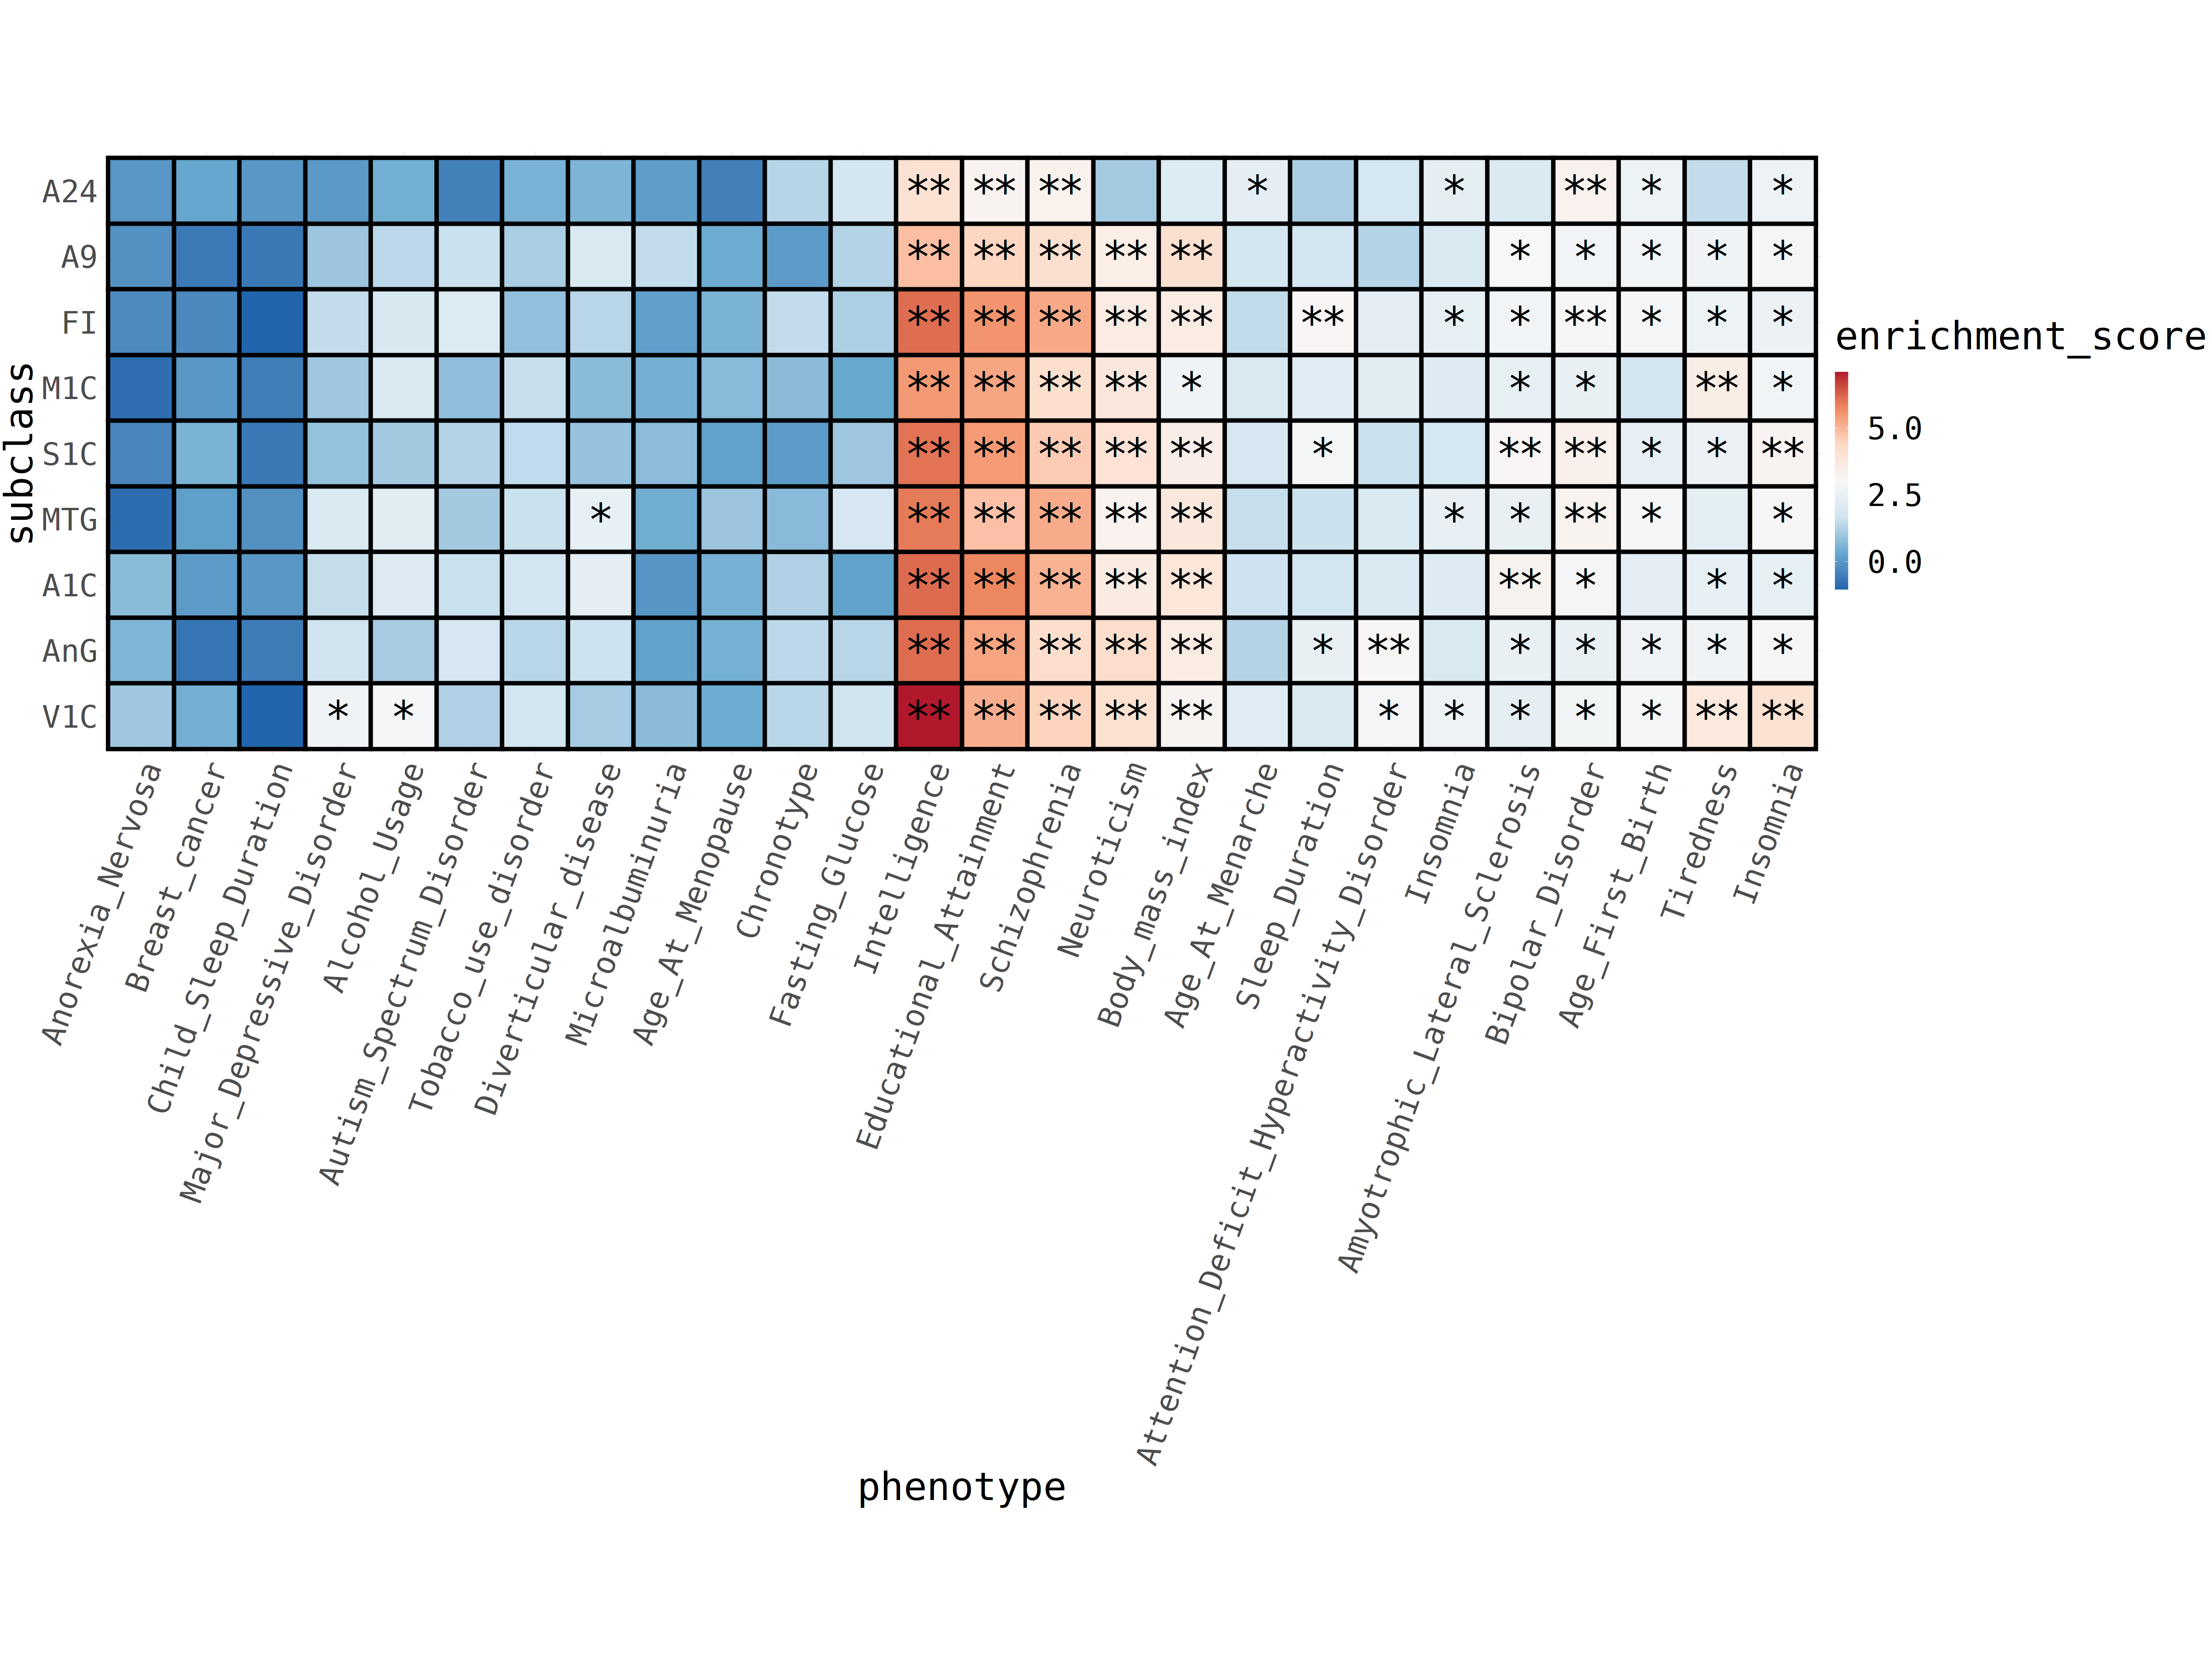

In [26]:
options(repr.plot.width = 40, repr.plot.height = 30)
plot <- ggplot(ldsc_table_plot, aes(x = phenotype, y = subclass, fill = enrichment_score, label = stars)) +
    geom_tile(color = "black", linewidth = 2) +
    geom_text(size = 20) +
    scale_fill_distiller(palette = "RdBu") + 
    coord_equal() +
    theme_minimal() +
    theme(
        text = element_text(family = "mono", size = 50),
        axis.text.x = element_text(hjust = 1, angle = 70),
        # axis.text.y = element_text(size = 40),
        # axis.title.x = element_text(size = 50),
        # axis.title.y = element_text(size = 50),
        legend.key.height = unit(2, "cm"),
        # legend.text = element_text(size = 40),
        # legend.title = element_text(size = 50)
    ) +
    scale_x_discrete(label = sapply(strsplit(levels(ldsc_table_plot$phenotype), split = "[.]"), tail, 1))
plot
ggsave(
    filename = sprintf("%s/%s-ldsc.pdf", figure_dir, subclass), 
    plot = plot, 
    dpi = 300, 
    width = 40, 
    height = 30, 
    device = "pdf"
)

In [37]:
subclass <- "SST"
ldsc_table <- read.table(sprintf("%s/ldsc_aggregate.tsv", subclass), header = TRUE, sep = '\t')
ldsc_table <- ldsc_table |>
    dplyr::filter((phenotype %in% traits)) |>
    dplyr::mutate(subclass = factor(subclass, levels = rev(region_order))) |>
    dplyr::mutate(qvalue = p.adjust(pvalue, method = 'fdr')) |>
    dplyr::mutate(phenotype = factor(phenotype)) |>
    dplyr::mutate(significant_or_not = pvalue < 0.05) |>
    dplyr::mutate(enrichment_score = coefficient / coefficient_ste) |>
    dplyr::mutate(stars = if_else(pvalue < 0.001, '**', if_else(pvalue < 0.01, '*', '')))
ldsc_table_enrichment <- ldsc_table[, c("phenotype", "enrichment_score", "subclass")]
ldsc_table_enrichment_matrix <- ldsc_table_enrichment |>
    tidyr::pivot_wider(id_cols = phenotype, names_from = subclass, values_from = enrichment_score)
n_cols <- ncol(ldsc_table_enrichment_matrix)
hclust_matrix <- as.matrix(ldsc_table_enrichment_matrix[, 2:n_cols])
rownames(hclust_matrix) <- as.data.frame(ldsc_table_enrichment_matrix)[, 1]
rowHclust <- hclust(dist(hclust_matrix))
ldsc_table_plot <- ldsc_table
ldsc_table_plot$phenotype <- factor(
    ldsc_table_plot$phenotype, levels = rownames(hclust_matrix)[rowHclust$order])
ldsc_table_plot$phenotype <- droplevels(ldsc_table_plot$phenotype)

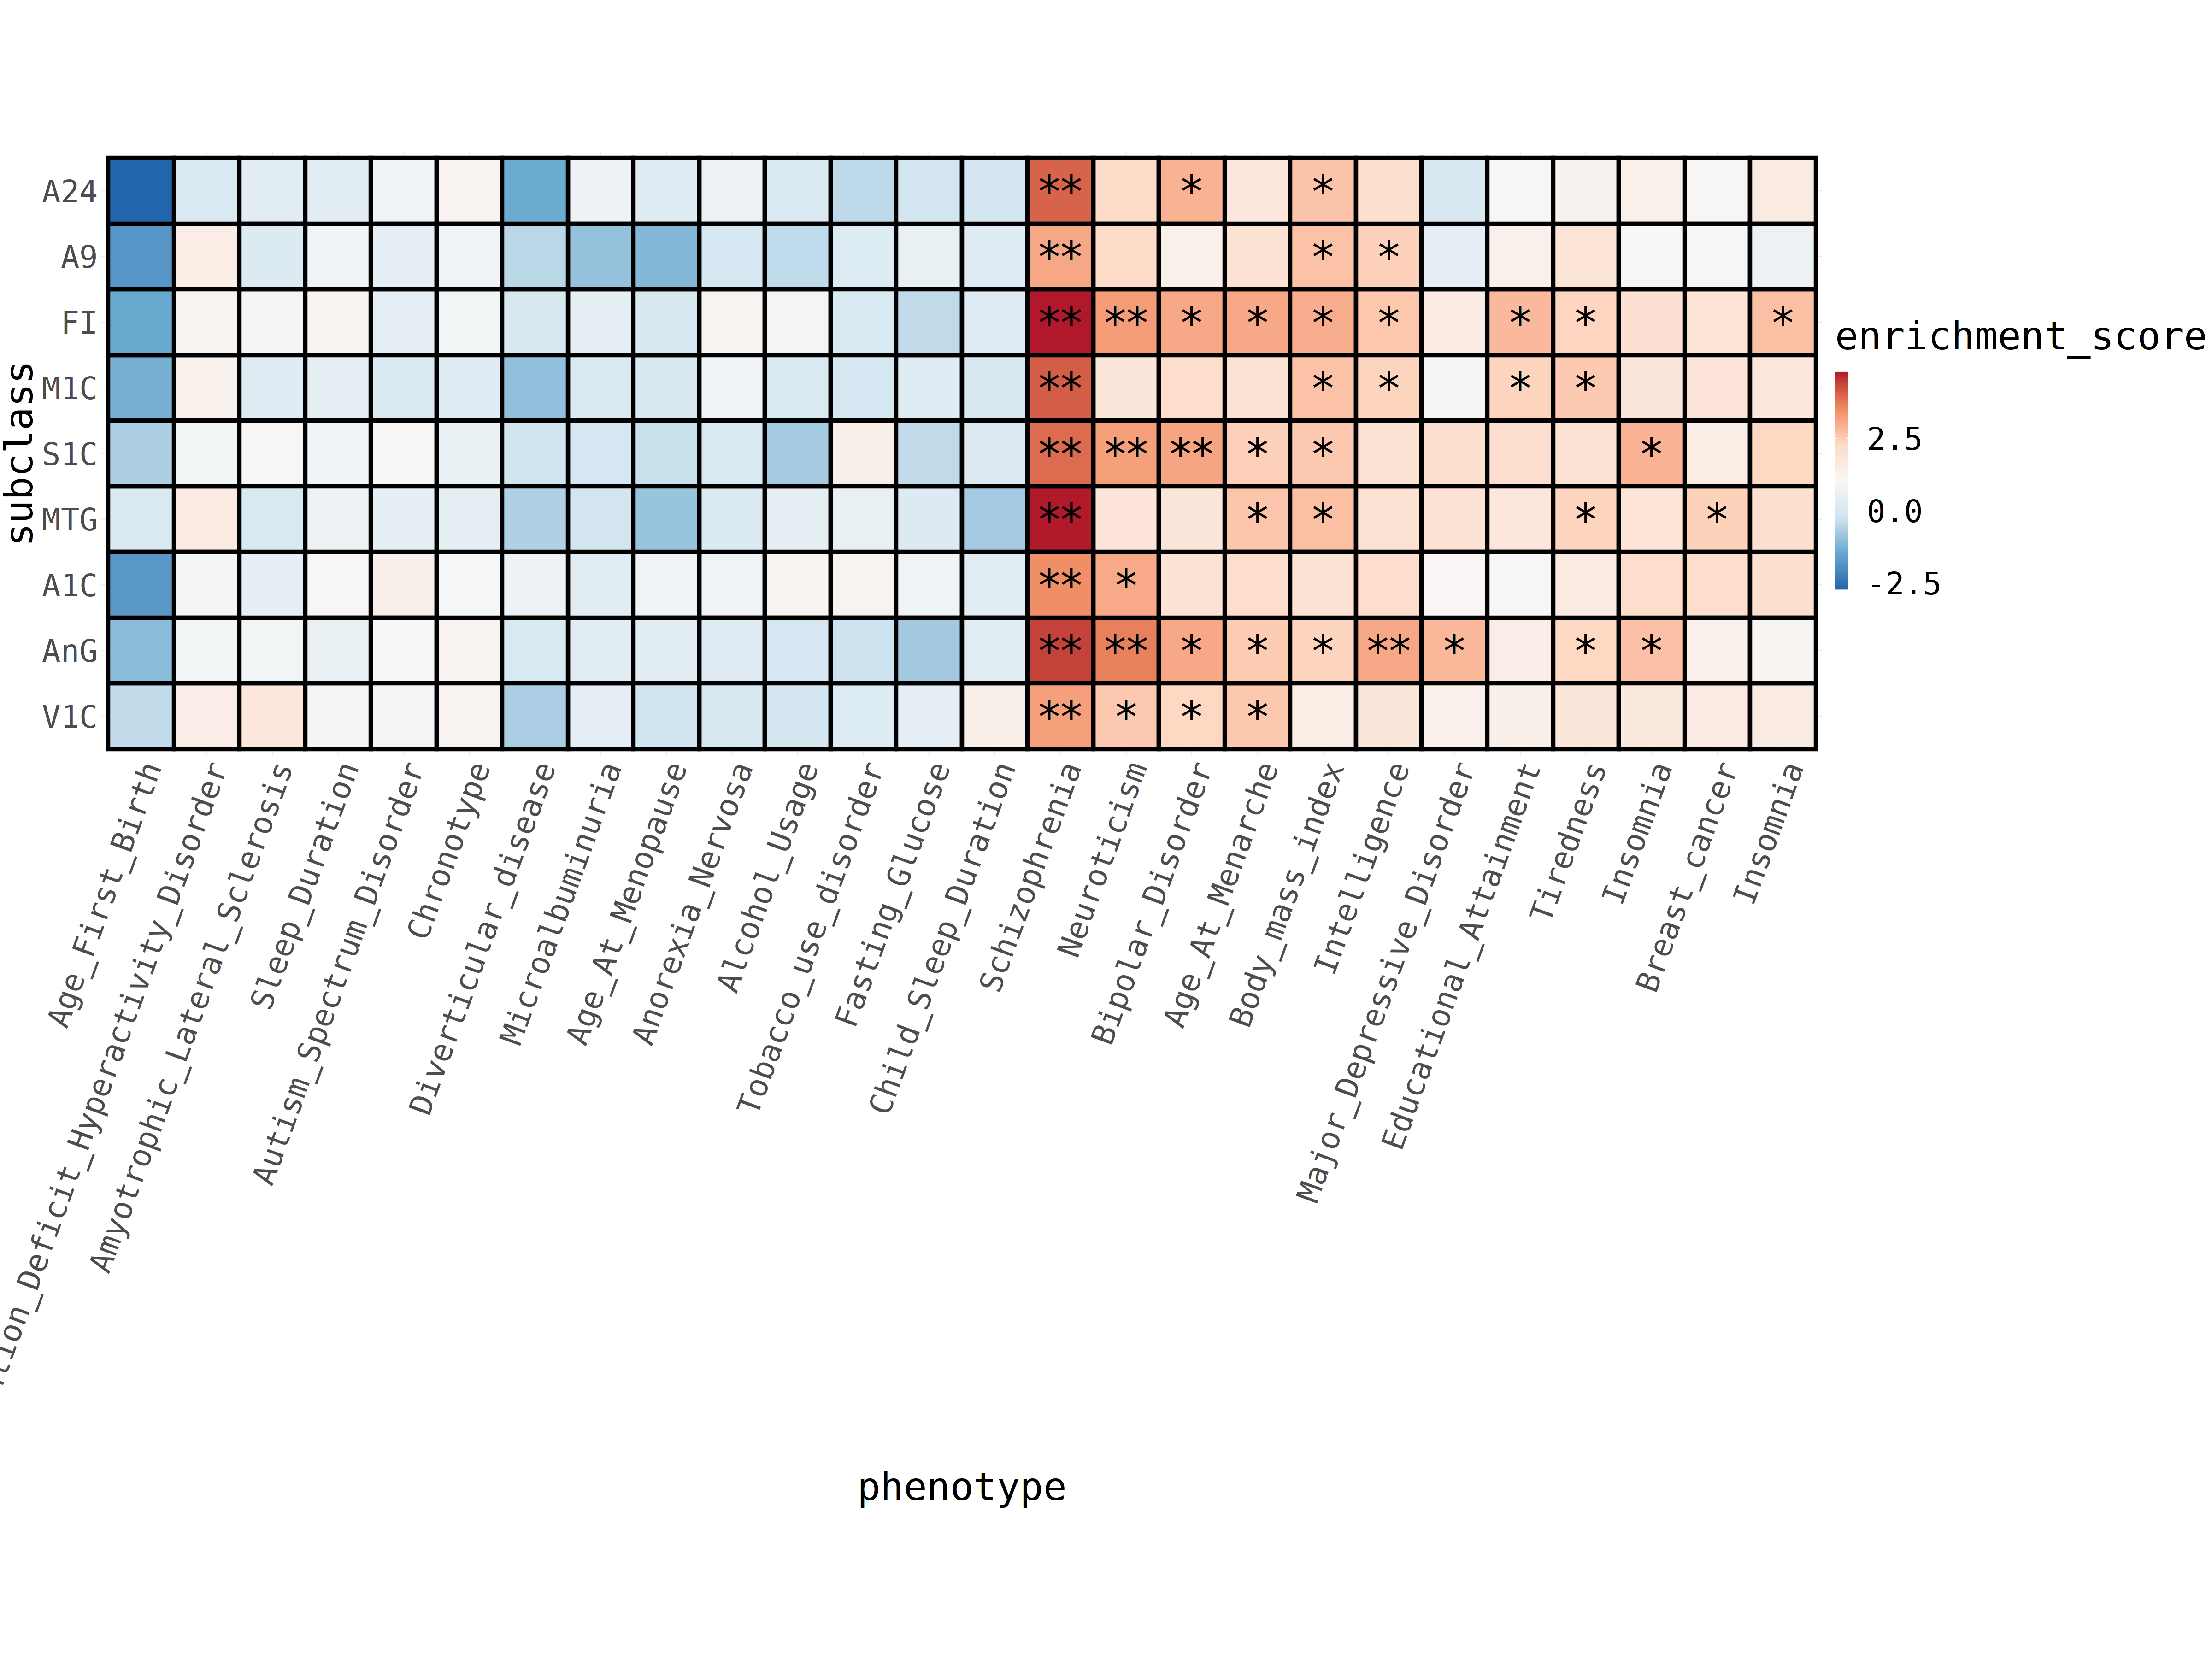

In [38]:
options(repr.plot.width = 40, repr.plot.height = 30)
plot <- ggplot(ldsc_table_plot, aes(x = phenotype, y = subclass, fill = enrichment_score, label = stars)) +
    geom_tile(color = "black", linewidth = 2) +
    geom_text(size = 20) +
    scale_fill_distiller(palette = "RdBu") + 
    coord_equal() +
    theme_minimal() +
    theme(
        text = element_text(family = "mono", size = 50),
        axis.text.x = element_text(hjust = 1, angle = 70),
        # axis.text.y = element_text(size = 40),
        # axis.title.x = element_text(size = 50),
        # axis.title.y = element_text(size = 50),
        legend.key.height = unit(2, "cm"),
        # legend.text = element_text(size = 40),
        # legend.title = element_text(size = 50)
    ) +
    scale_x_discrete(label = sapply(strsplit(levels(ldsc_table_plot$phenotype), split = "[.]"), tail, 1))
plot
ggsave(
    filename = sprintf("%s/%s-ldsc.pdf", figure_dir, subclass), 
    plot = plot, 
    dpi = 300, 
    width = 40, 
    height = 30, 
    device = "pdf"
)

In [27]:
traits <- c()
included_subclasses <- c("Oligo", "Astro", "Micro_PVM")
for (subclass_dir in included_subclasses) {
    if (subclass_dir == "baseset") {
        next
    }
    ldsc_table <- read.table(sprintf("%s/ldsc_aggregate.tsv", subclass_dir), header = TRUE, sep = "\t")
    tmp <- ldsc_table |>
        dplyr::group_by(phenotype) |>
        dplyr::summarise(any_below_0.05 = any(pvalue < 0.01)) |>
        dplyr::filter(any_below_0.05)
    traits <- c(traits, tmp$phenotype)
}
traits <- unique(traits)
traits <- traits[traits %in% non_re_traits]

In [28]:
subclass <- "Micro_PVM"
ldsc_table <- read.table(sprintf("%s/ldsc_aggregate.tsv", subclass), header = TRUE, sep = '\t')
ldsc_table <- ldsc_table |>
    dplyr::filter((phenotype %in% traits)) |>
    dplyr::mutate(subclass = factor(subclass, levels = rev(region_order))) |>
    dplyr::mutate(qvalue = p.adjust(pvalue, method = 'fdr')) |>
    dplyr::mutate(phenotype = factor(phenotype)) |>
    dplyr::mutate(significant_or_not = pvalue < 0.05) |>
    dplyr::mutate(enrichment_score = coefficient / coefficient_ste) |>
    dplyr::mutate(stars = if_else(pvalue < 0.001, '**', if_else(pvalue < 0.01, '*', '')))
ldsc_table_enrichment <- ldsc_table[, c("phenotype", "enrichment_score", "subclass")]
ldsc_table_enrichment_matrix <- ldsc_table_enrichment |>
    tidyr::pivot_wider(id_cols = phenotype, names_from = subclass, values_from = enrichment_score)
n_cols <- ncol(ldsc_table_enrichment_matrix)
hclust_matrix <- as.matrix(ldsc_table_enrichment_matrix[, 2:n_cols])
rownames(hclust_matrix) <- as.data.frame(ldsc_table_enrichment_matrix)[, 1]
rowHclust <- hclust(dist(hclust_matrix))
ldsc_table_plot <- ldsc_table
ldsc_table_plot$phenotype <- factor(
    ldsc_table_plot$phenotype, levels = rownames(hclust_matrix)[rowHclust$order])
ldsc_table_plot$phenotype <- droplevels(ldsc_table_plot$phenotype)

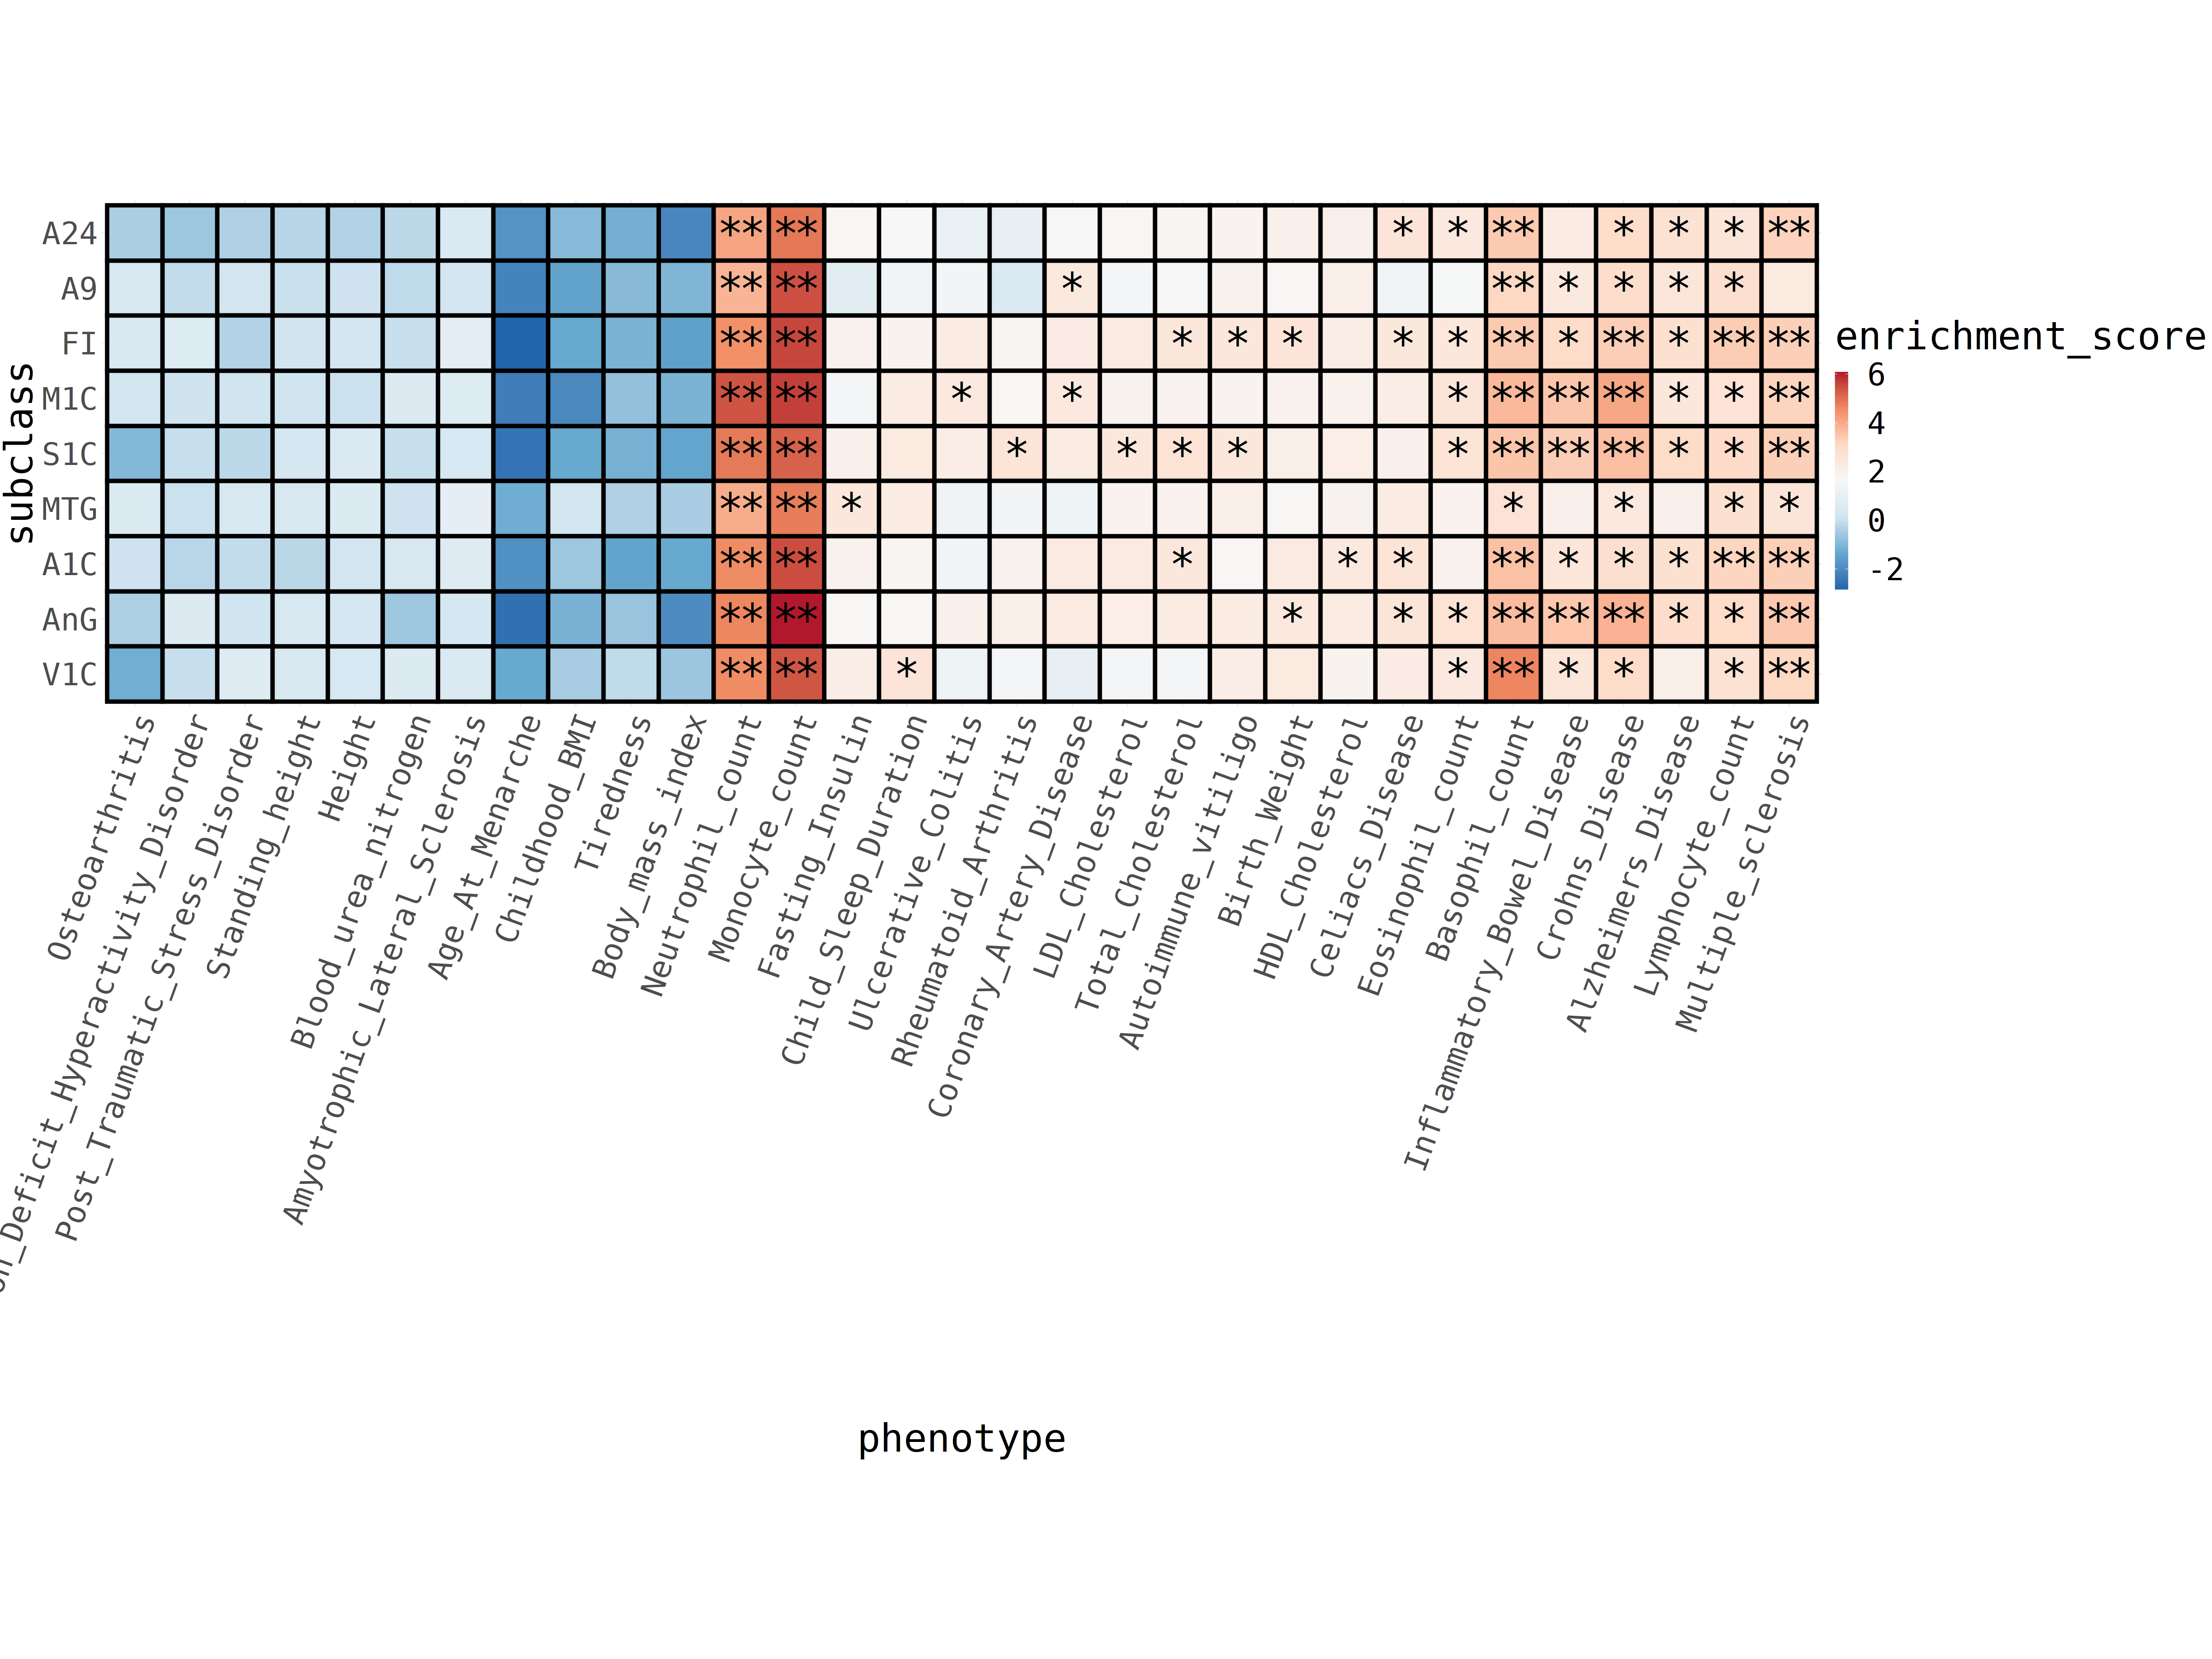

In [29]:
options(repr.plot.width = 40, repr.plot.height = 30)
plot <- ggplot(ldsc_table_plot, aes(x = phenotype, y = subclass, fill = enrichment_score, label = stars)) +
    geom_tile(color = "black", linewidth = 2) +
    geom_text(size = 20) +
    scale_fill_distiller(palette = "RdBu") + 
    coord_equal() +
    theme_minimal() +
    theme(
        text = element_text(family = "mono", size = 50),
        axis.text.x = element_text(hjust = 1, angle = 70),
        # axis.text.y = element_text(size = 40),
        # axis.title.x = element_text(size = 50),
        # axis.title.y = element_text(size = 50),
        legend.key.height = unit(2, "cm"),
        # legend.text = element_text(size = 40),
        # legend.title = element_text(size = 50)
    ) +
    scale_x_discrete(label = sapply(strsplit(levels(ldsc_table_plot$phenotype), split = "[.]"), tail, 1))
plot
ggsave(
    filename = sprintf("%s/%s-ldsc.pdf", figure_dir, subclass), 
    plot = plot, 
    dpi = 300, 
    width = 40, 
    height = 30, 
    device = "pdf"
)

In [30]:
subclass <- "Oligo"
ldsc_table <- read.table(sprintf("%s/ldsc_aggregate.tsv", subclass), header = TRUE, sep = '\t')
ldsc_table <- ldsc_table |>
    dplyr::filter((phenotype %in% traits)) |>
    dplyr::mutate(subclass = factor(subclass, levels = rev(region_order))) |>
    dplyr::mutate(qvalue = p.adjust(pvalue, method = 'fdr')) |>
    dplyr::mutate(phenotype = factor(phenotype)) |>
    dplyr::mutate(significant_or_not = pvalue < 0.05) |>
    dplyr::mutate(enrichment_score = coefficient / coefficient_ste) |>
    dplyr::mutate(stars = if_else(pvalue < 0.001, '**', if_else(pvalue < 0.01, '*', '')))
ldsc_table_enrichment <- ldsc_table[, c("phenotype", "enrichment_score", "subclass")]
ldsc_table_enrichment_matrix <- ldsc_table_enrichment |>
    tidyr::pivot_wider(id_cols = phenotype, names_from = subclass, values_from = enrichment_score)
n_cols <- ncol(ldsc_table_enrichment_matrix)
hclust_matrix <- as.matrix(ldsc_table_enrichment_matrix[, 2:n_cols])
rownames(hclust_matrix) <- as.data.frame(ldsc_table_enrichment_matrix)[, 1]
rowHclust <- hclust(dist(hclust_matrix))
ldsc_table_plot <- ldsc_table
ldsc_table_plot$phenotype <- factor(
    ldsc_table_plot$phenotype, levels = rownames(hclust_matrix)[rowHclust$order])
ldsc_table_plot$phenotype <- droplevels(ldsc_table_plot$phenotype)

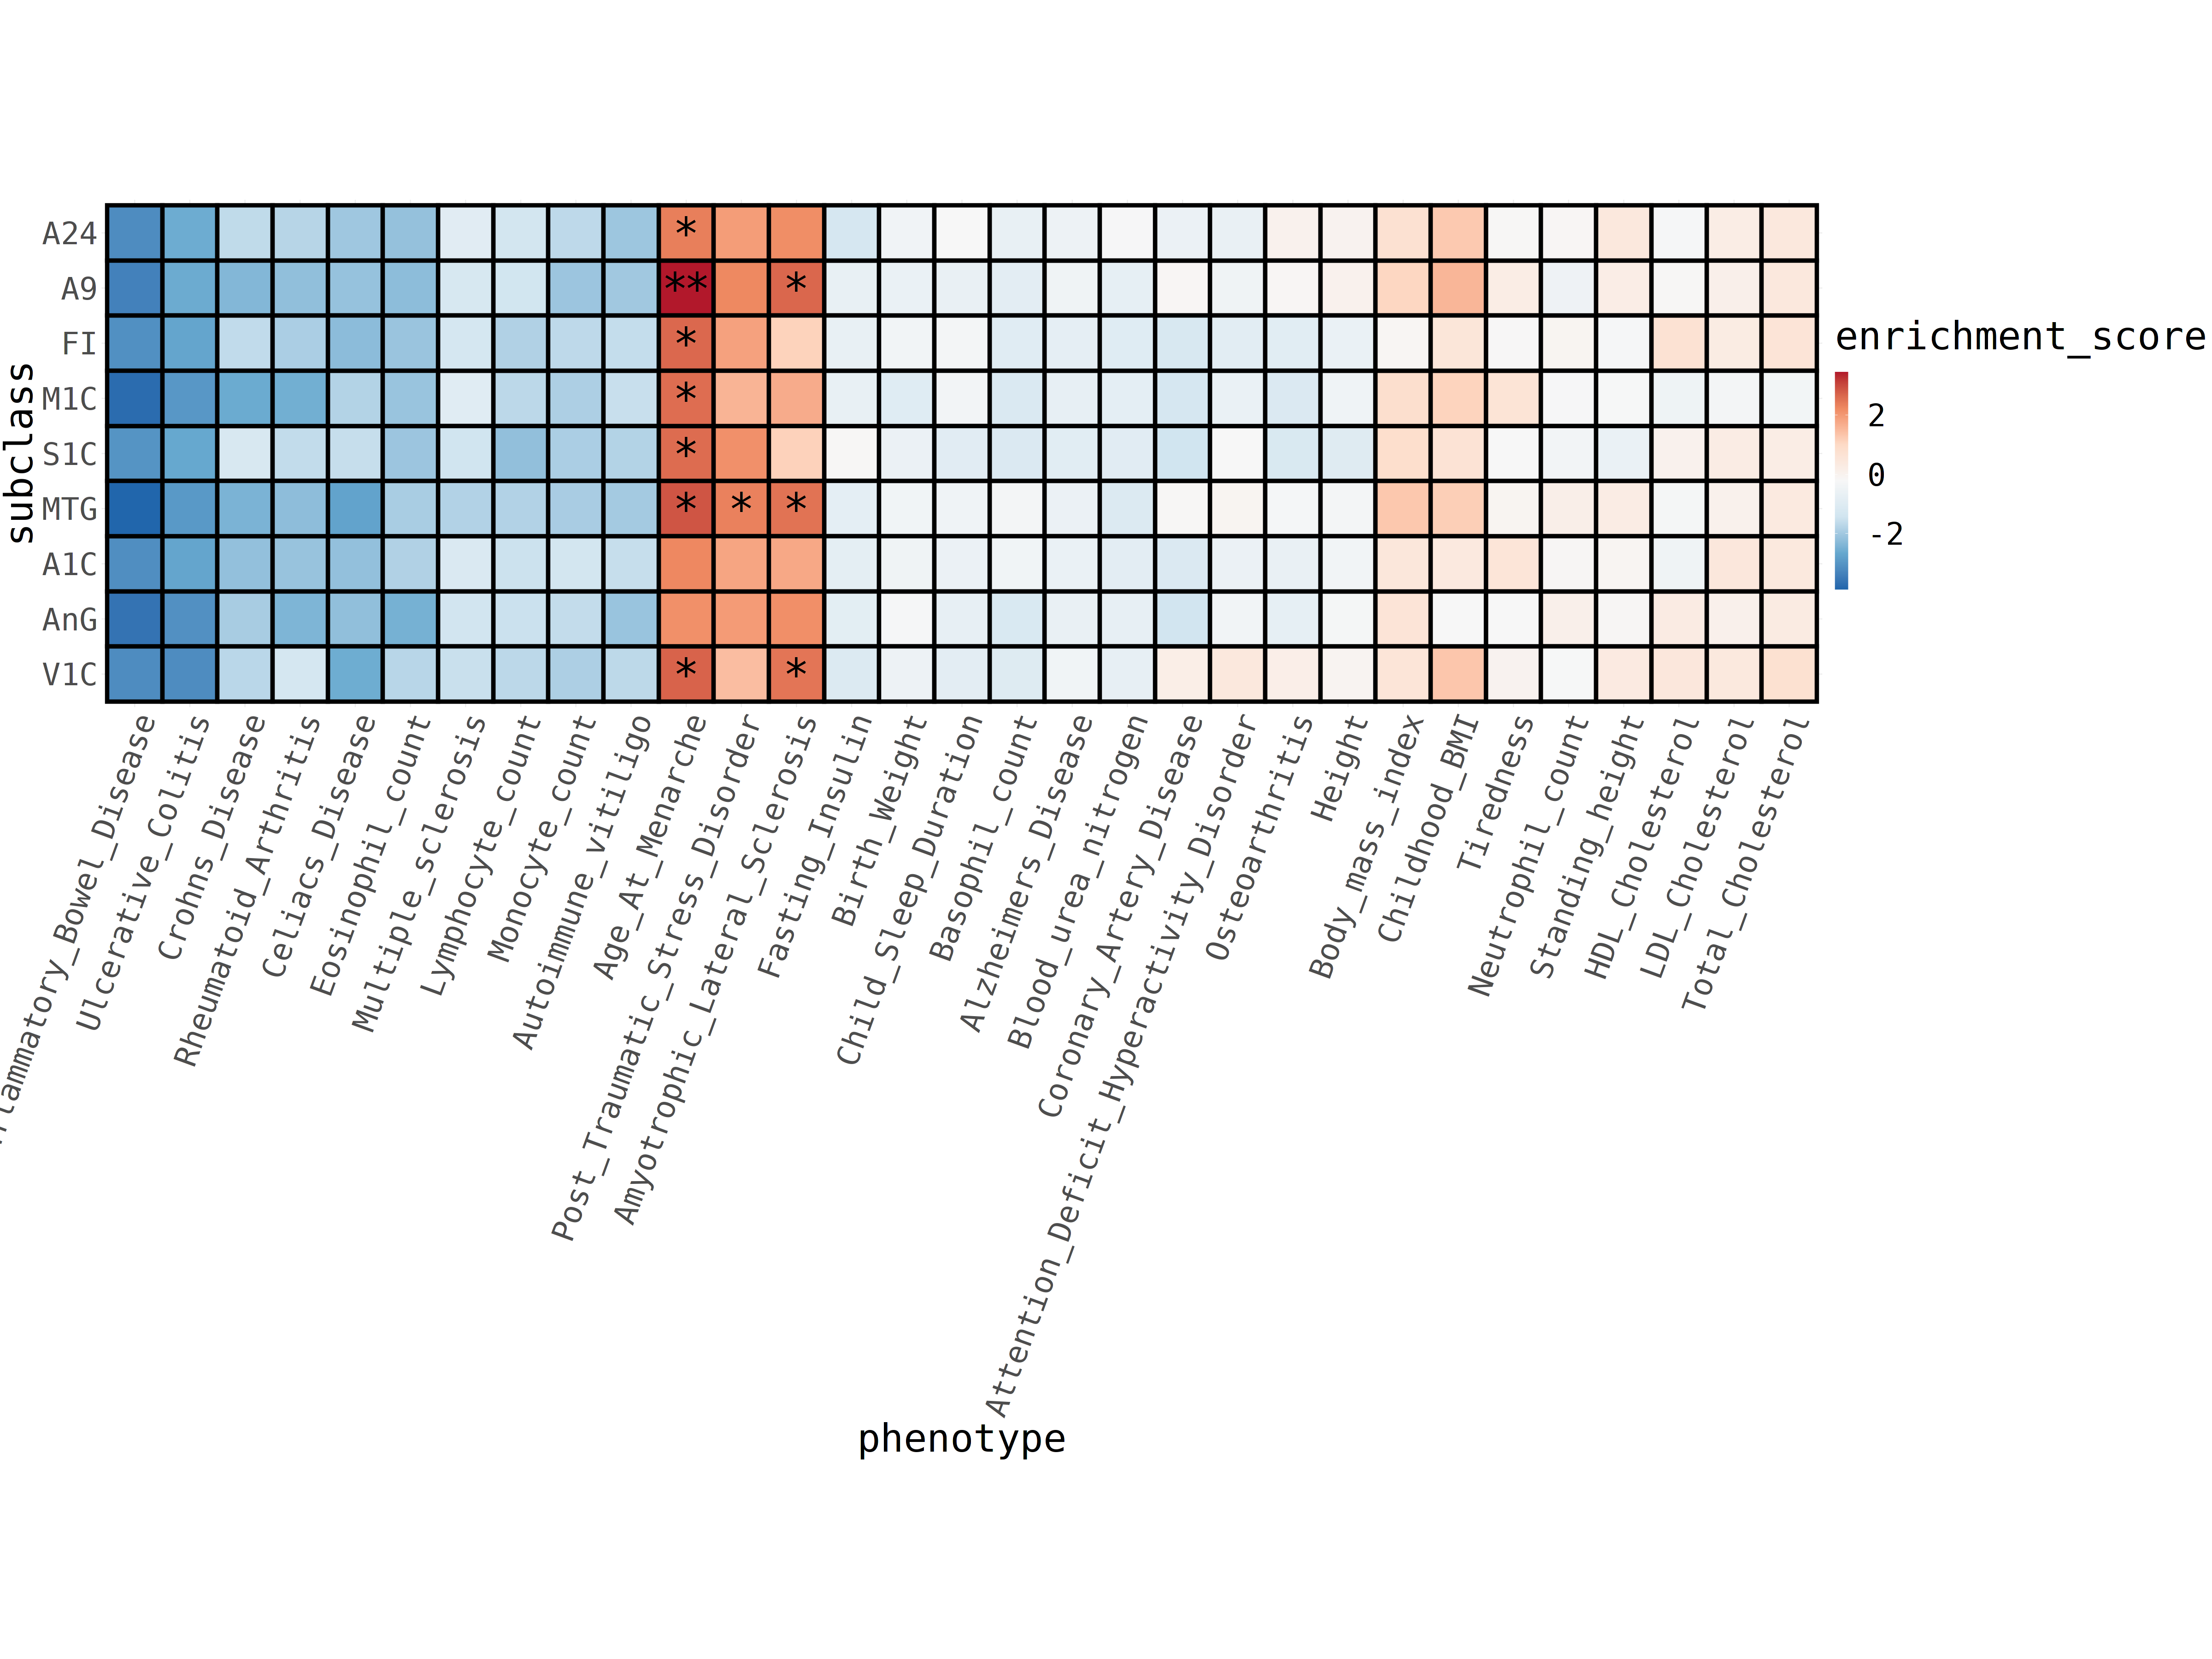

In [31]:
options(repr.plot.width = 40, repr.plot.height = 30)
plot <- ggplot(ldsc_table_plot, aes(x = phenotype, y = subclass, fill = enrichment_score, label = stars)) +
    geom_tile(color = "black", linewidth = 2) +
    geom_text(size = 20) +
    scale_fill_distiller(palette = "RdBu") + 
    coord_equal() +
    theme_minimal() +
    theme(
        text = element_text(family = "mono", size = 50),
        axis.text.x = element_text(hjust = 1, angle = 70),
        # axis.text.y = element_text(size = 40),
        # axis.title.x = element_text(size = 50),
        # axis.title.y = element_text(size = 50),
        legend.key.height = unit(2, "cm"),
        # legend.text = element_text(size = 40),
        # legend.title = element_text(size = 50)
    ) +
    scale_x_discrete(label = sapply(strsplit(levels(ldsc_table_plot$phenotype), split = "[.]"), tail, 1))
plot
ggsave(
    filename = sprintf("%s/%s-ldsc.pdf", figure_dir, subclass), 
    plot = plot, 
    dpi = 300, 
    width = 40, 
    height = 30, 
    device = "pdf"
)

In [32]:
subclass <- "Astro"
ldsc_table <- read.table(sprintf("%s/ldsc_aggregate.tsv", subclass), header = TRUE, sep = '\t')
ldsc_table <- ldsc_table |>
    dplyr::filter((phenotype %in% traits)) |>
    dplyr::mutate(subclass = factor(subclass, levels = rev(region_order))) |>
    dplyr::mutate(qvalue = p.adjust(pvalue, method = 'fdr')) |>
    dplyr::mutate(phenotype = factor(phenotype)) |>
    dplyr::mutate(significant_or_not = pvalue < 0.05) |>
    dplyr::mutate(enrichment_score = coefficient / coefficient_ste) |>
    dplyr::mutate(stars = if_else(pvalue < 0.001, '**', if_else(pvalue < 0.01, '*', '')))
ldsc_table_enrichment <- ldsc_table[, c("phenotype", "enrichment_score", "subclass")]
ldsc_table_enrichment_matrix <- ldsc_table_enrichment |>
    tidyr::pivot_wider(id_cols = phenotype, names_from = subclass, values_from = enrichment_score)
n_cols <- ncol(ldsc_table_enrichment_matrix)
hclust_matrix <- as.matrix(ldsc_table_enrichment_matrix[, 2:n_cols])
rownames(hclust_matrix) <- as.data.frame(ldsc_table_enrichment_matrix)[, 1]
rowHclust <- hclust(dist(hclust_matrix))
ldsc_table_plot <- ldsc_table
ldsc_table_plot$phenotype <- factor(
    ldsc_table_plot$phenotype, levels = rownames(hclust_matrix)[rowHclust$order])
ldsc_table_plot$phenotype <- droplevels(ldsc_table_plot$phenotype)

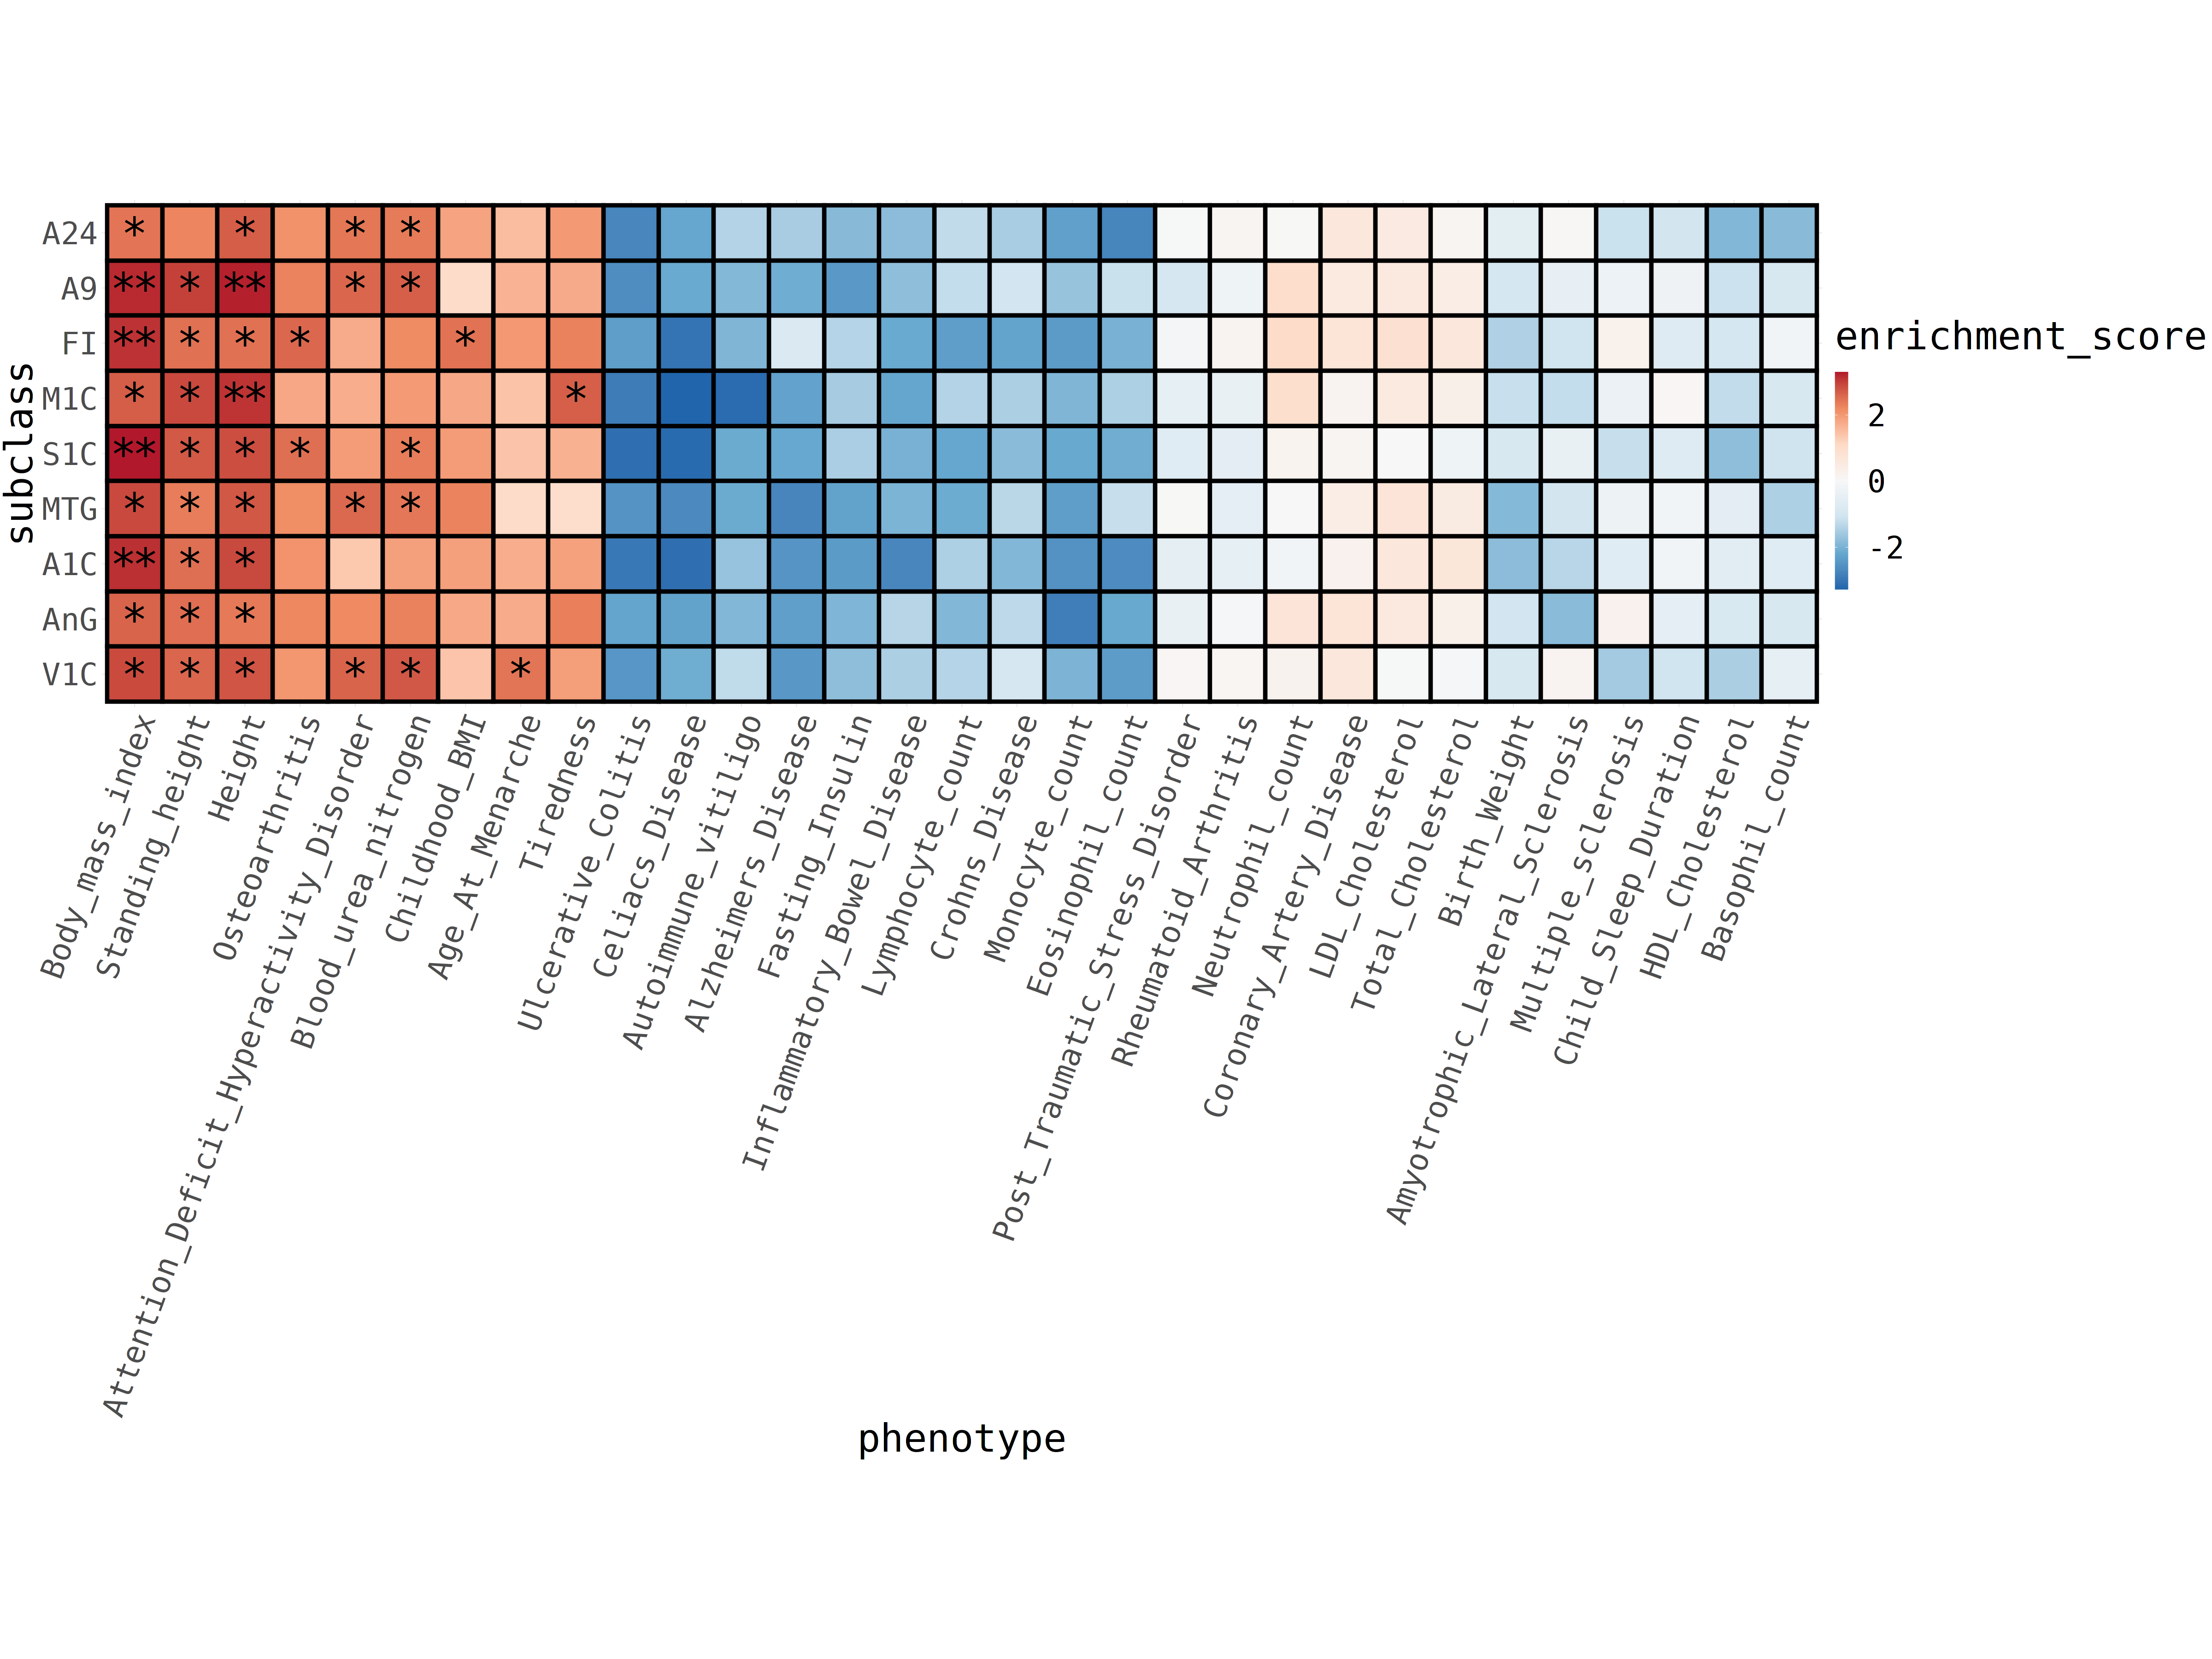

In [33]:
options(repr.plot.width = 40, repr.plot.height = 30)
plot <- ggplot(ldsc_table_plot, aes(x = phenotype, y = subclass, fill = enrichment_score, label = stars)) +
    geom_tile(color = "black", linewidth = 2) +
    geom_text(size = 20) +
    scale_fill_distiller(palette = "RdBu") + 
    coord_equal() +
    theme_minimal() +
    theme(
        text = element_text(family = "mono", size = 50),
        axis.text.x = element_text(hjust = 1, angle = 70),
        # axis.text.y = element_text(size = 40),
        # axis.title.x = element_text(size = 50),
        # axis.title.y = element_text(size = 50),
        legend.key.height = unit(2, "cm"),
        # legend.text = element_text(size = 40),
        # legend.title = element_text(size = 50)
    ) +
    scale_x_discrete(label = sapply(strsplit(levels(ldsc_table_plot$phenotype), split = "[.]"), tail, 1))
plot
ggsave(
    filename = sprintf("%s/%s-ldsc.pdf", figure_dir, subclass), 
    plot = plot, 
    dpi = 300, 
    width = 40, 
    height = 30, 
    device = "pdf"
)

## Combine the plot

In [4]:
traits <- c(
    # "Arvanitis.NatCommun.2019.Heart_Failure",
    # "Astle.Cell.2016.Basophil_count",
    # "Astle.Cell.2016.Eosinophil_count",
    # "Astle.Cell.2016.Lymphocyte_count",
    # "Astle.Cell.2016.Monocyte_count",
    # "Astle.Cell.2016.Neutrophil_count",
    # "Aylward.2018.biorxiv.Type_1_Diabetes",
    # "Barban.NatGenet.2016.Age_First_Birth",
    # "Barban.NatGenet.2016.Number_Children_Born",
    # "Bentham.NatGenet.2015.Lupus",
    # "Bentham.NatGenet.2015.Systemic_lupus_erythematosus",
    # "Bronson.NatGenet.2016.IgA_deficiency",
    # "Chiou.Nature.2021.Type_1_diabetes",
    # "Cordell.NatCommun.2015.Primary_Biliary_Cirrhosis",
    # "Deary.MolPsychiatry.2017.Tiredness",
    # "deLange.NatGenet.2017.Crohns_Disease",
    # "deLange.NatGenet.2017.Inflammatory_Bowel_Disease",
    # "deLange.NatGenet.2017.Ulcerative_Colitis",
    # "Demenais.NatGenet.2018.Asthma",
    "Demontis.NatGenet.2019.Attention_Deficit_Hyperactivity_Disorder",
    # "denHoed.NatGenet.2013.Heart_Rate",
    # "Dubois.NatGenet.2010.Celiacs_Disease",
    "Duncan.AmJPsychiatry.2017.Anorexia_Nervosa",
    # "Dupuis.NatGenet.2010.HOMA-B",
    # "Dupuis.NatGenet.2010.HOMA-IR",
    # "EAGLE.AmJMedGenet.2016.Childhood_Aggression",
    # "EAGLE.NatGenet.2015.Atopic_Dermatitis",
    # "Felix.HumMolGenet.2015.Childhood_BMI",
    # "Ferreira.2019.AJHG.Asthma_child_onset",
    # "Ferreira.NatGenet.2017.Allergy",
    # "GLGC.NatGenet.2013.HDL_Cholesterol",
    # "GLGC.NatGenet.2013.LDL_Cholesterol",
    # "GLGC.NatGenet.2013.Total_Cholesterol",
    # "GLGC.NatGenet.2013.Triglycerides",
    "Grove.NatGenet.2019.Autism_Spectrum_Disorder",
    "Hammerschlag.NatGenet.2017.Insomnia",
    # "Hoffmann.NatGenet.2018.HDL_cholesterol",
    # "Hoffmann.NatGenet.2018.LDL_cholesterol",
    # "Hoffmann.NatGenet.2018.Total_cholesterol",
    # "Hoffmann.NatGenet.2018.Triglycerides",
    # "Horikoshi.Nature.2016.Birth_Weight",
    # "Hou.HumMolGenet.2016.Bipolar_Disorder",
    # "IMSGC.NatGenet.2011.Multiple_Sclerosis",
    # "IMSGC.Science.2019.Multiple_sclerosis",
    # "Jansen.2019.NatGenet.Insomnia",
    # "Jansen.NatGenet.2019.Alzheimers_disease",
    "Jansen.NatGenet.2019.Alzheimers_Disease",
    # "Jiang.NatGenet.2018.Vitamin_D",
    # "Ji.NatGenet.2017.Primary_Sclerosing_Cholangitis",
    # "Jin.NatGenet.2016.Autoimmune_vitiligo",
    # "Jin.NatGenet.2016.Vitiligo",
    # "Jones.PLOSGen.2016.Chronotype",
    # "Jones.PLOSGen.2016.Sleep_Duration",
    # "Kemp.NatGenet.2017.Heel_bone_mineral_density",
    # "Kilpelainen.NatCommun.2016.Leptin",
    # "Lambert.NatGenet.2013.Alzheimers_Disease",
    # "Locke.Nature.2015.BMI",
    "Luciano.NatGenet.2017.Neuroticism",
    # "Mahajan.NatGenet.2018.Type_2_Diabetes",
    # "Malik.2018.NatGenet.Stroke",
    # "Manning.NatGenet.2012.Fasting_Glucose",
    # "Manning.NatGenet.2012.Fasting_Glucose_adj_BMI",
    # "Manning.NatGenet.2012.Fasting_Insulin",
    # "Manning.NatGenet.2012.Fasting_Insulin_adj_BMI",
    # "Marinelli.Sleep.2016.Child_Sleep_Duration",
    # "Michailidou.Nature.2017.Breast_cancer",
    # "Namjou.BMCMed.2019.Nonalcoholic_fatty_liver_disease",
    # "Nelson.NatGenet.2017.Coronary_Artery_Disease",
    # "Nielson.2018.NatGenet.Atrial_Fibrillation",
    # "Okada.Nature.2014.Rheumatoid_Arthritis",
    "Okbay.Nature.2016.Educational_Attainment",
    # "Pattaro.NatCommun.2016.Chronic_Kidney_Disease",
    # "PGC.MolPsychiatry.2017.Obsessive_Compulsive_Disorder",
    "PGC.MolPsychiatry.2017.Post_Traumatic_Stress_Disorder",
    "PGC.Nature.2014.Schizophrenia",
    # "ReproGen.NatGenet.2015.Age_At_Menopause",
    # "ReproGen.NatGenet.2017.Age_At_Menarche",
    # "SAIGE.UKBB.2018.Tobacco_use_disorder",
    # "Sakornsakolpat.NatGenet.2019.Chronic_obstructive_pulmonary_disease",
    "Savage.NatGenet.2018.Intelligence",
    # "Saxena.NatGenet.2010.2hr_Glucose_adjBMI",
    # "Schafmayer.Gut.2019.Diverticular_disease",
    "Schumann.PNAS.2016.Alcohol_Usage",
    # "Shadrina.PLoSGenet.2019.Varicose_veins",
    # "Shrine.NatGenet.2019.FEV1_FVC_ratio",
    # "Shrine.NatGenet.2019.Forced_expiration_volume",
    # "Shrine.NatGenet.2019.Forced_vital_capacity",
    # "Shrine.NatGenet.2019.Peak_expiratory_flow",
    # "Sniekers.NatGenet.2017.Intelligence",
    "Stahl.2018.biorxiv.Bipolar_Disorder",
    # "Strawbridge.Diabetes.2011.Fasting_ProInsulin",
    # "Taal.NatGenet.2012.Head_Circumference",
    # "Tachmazidou.NatGenet.2019.Osteoarthritis",
    # "Teumer.Diabetes.2016.Microalbuminuria",
    # "Teumer.NatCommun.2018.Thyroid_stimulating_hormone",
    # "Tin.NatGenet.2019.Gout",
    # "Tin.NatGenet.2019.Serum_urate",
    "UKB.Neale_v2.2018.Body_mass_index",
    # "UKB.Neale_v2.2018.Standing_height",
    # "UKB.Neale_v2.2018.Vitamin_D",
    # "vandenBerg.BehavGenet.2016.Extraversion",
    # "vanderValk.HumMolGenet.2014.Birth_Length",
    "vanRheenen.NatGenet.2016.Amyotrophic_Lateral_Sclerosis",
    # "Watanabe.NatGenet.2019.Diastolic_blood_pressure",
    # "Watanabe.NatGenet.2019.Pulse_rate",
    # "Watanabe.NatGenet.2019.Systolic_blood_pressure",
    # "Watson.2018.NatGenet.Anorexia_Nervosa",
    # "Wheeler.PlosMed.2017.HbA1c",
    # "Wiberg.NatCommun.2019.Carpal_tunnel_syndrome",
    "Wray.biorxiv.2018.Major_Depressive_Disorder",
    # "Wuttke.NatGenet.2019.Blood_urea_nitrogen",
    # "Wuttke.NatGenet.2019.Chronic_kidney_disease",
    # "Wuttke.NatGenet.2019.eGFR",
    # "Wuttke.NatGenet.2019.Serum_creatinine",
    # "Yengo.biorxiv.2018.BMI",
    "Yengo.biorxiv.2018.Height"
    # "Zhu.RespirRes.2019.Hypertension"
)

In [5]:
included_subclasses <- c(
    "L2_3_IT", "L4_IT", "L5_IT", "L6_IT", "PVALB", "SST",
    "Micro_PVM", "Oligo", "Astro"
)

In [6]:
subclass_tables <- vector("list", length = length(included_subclasses))
names(subclass_tables) <- included_subclasses
for (subclass in included_subclasses) {
    ldsc_table <- read.table(sprintf("%s/ldsc_aggregate.tsv", subclass), header = TRUE, sep = "\t")
    subclass_tables[[subclass]] <- ldsc_table
}
combined_df <- bind_rows(subclass_tables, .id = "subclass_names")

In [7]:
ldsc_table <- combined_df |>
    dplyr::filter((phenotype %in% traits)) |>
    dplyr::group_by(subclass_names) |>
    dplyr::mutate(subclass = factor(subclass, levels = rev(region_order))) |>
    dplyr::mutate(qvalue = p.adjust(pvalue, method = 'fdr')) |>
    dplyr::mutate(phenotype = factor(phenotype)) |>
    dplyr::mutate(significant_or_not = pvalue < 0.05) |>
    dplyr::mutate(enrichment_score = coefficient / coefficient_ste) |>
    dplyr::mutate(stars = if_else(pvalue < 0.001, '**', if_else(pvalue < 0.01, '*', ''))) |>
    dplyr::ungroup()
ldsc_table_enrichment <- ldsc_table[, c("phenotype", "enrichment_score", "subclass", "subclass_names")]
ldsc_table_enrichment_matrix <- ldsc_table_enrichment |>
    tidyr::pivot_wider(id_cols = phenotype, names_from = c("subclass_names", "subclass"), values_from = enrichment_score)
n_cols <- ncol(ldsc_table_enrichment_matrix)
hclust_matrix <- as.matrix(ldsc_table_enrichment_matrix[, 2:n_cols])
rownames(hclust_matrix) <- as.data.frame(ldsc_table_enrichment_matrix)[, 1]
rowHclust <- hclust(dist(hclust_matrix))
ldsc_table_plot <- ldsc_table
ldsc_table_plot$phenotype <- factor(
    ldsc_table_plot$phenotype, levels = rownames(hclust_matrix)[rowHclust$order])
ldsc_table_plot$phenotype <- droplevels(ldsc_table_plot$phenotype)

In [8]:
ldsc_table_plot <- ldsc_table_plot |>
    dplyr::mutate(index = paste(subclass_names, subclass, sep = "_"))
ldsc_table_plot$index <- factor(ldsc_table_plot$index, levels = unique(ldsc_table_plot$index))

In [9]:
figure_dir <- "/tscc/projects/ps-epigen/users/biy022/biccn/analysis/final_figures/"

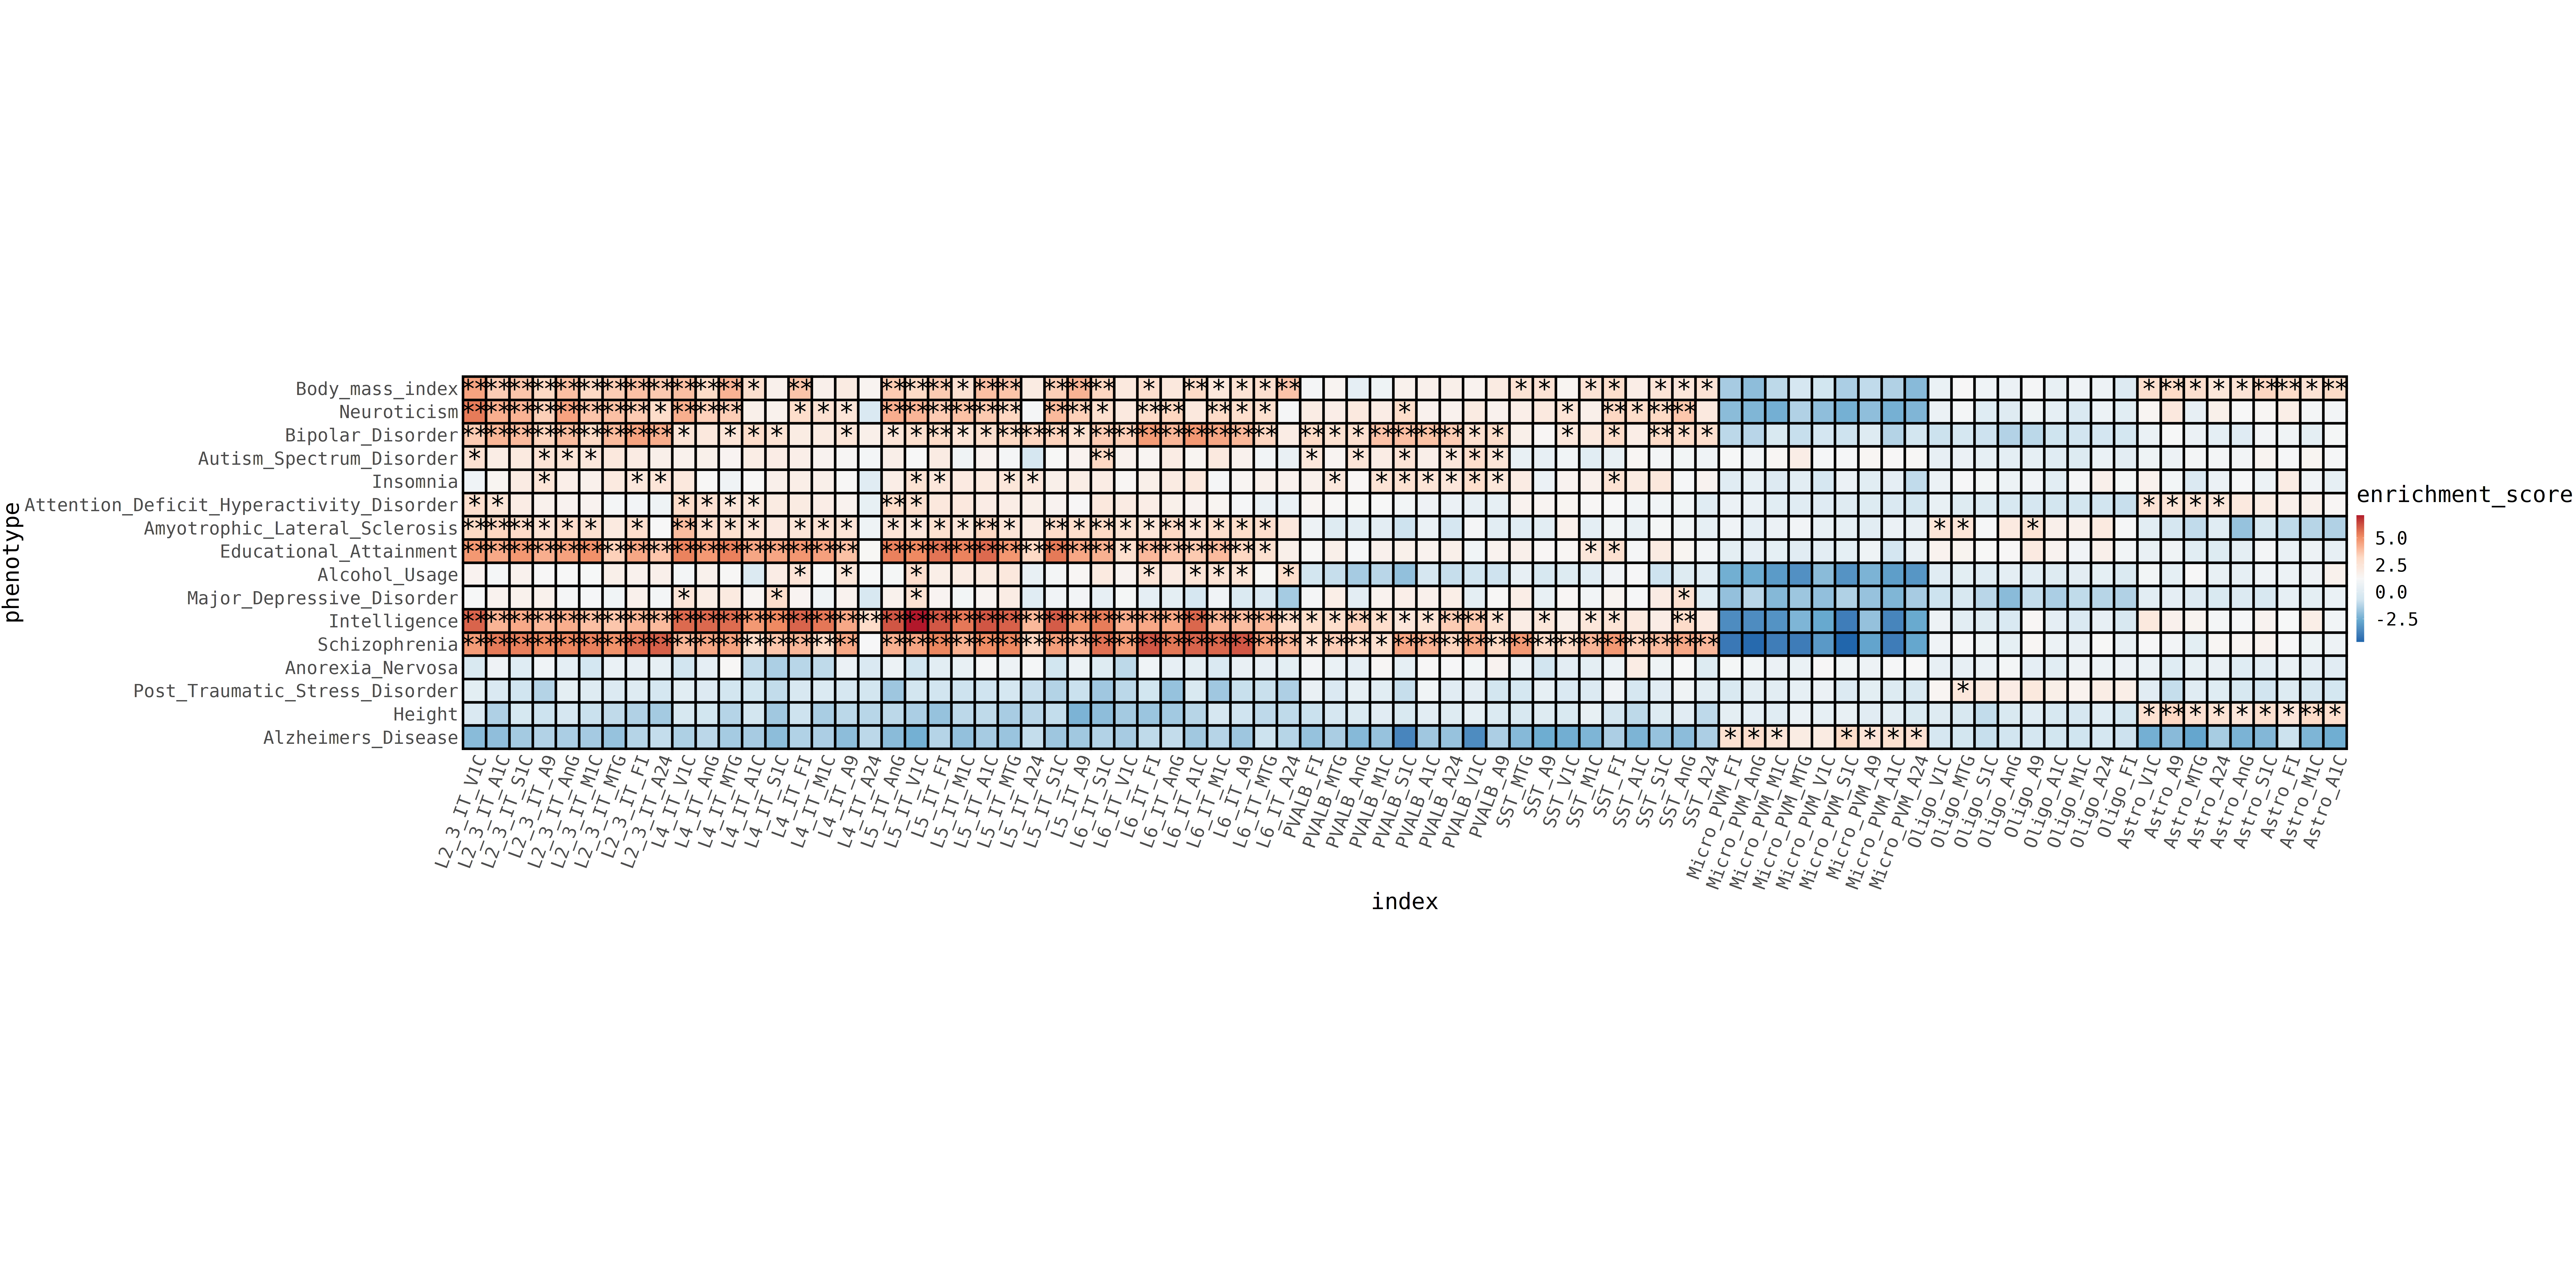

In [13]:
options(repr.plot.width = 80, repr.plot.height = 40)
plot <- ggplot(ldsc_table_plot, aes(x = index, y = phenotype, fill = enrichment_score, label = stars)) +
    geom_tile(color = "black", linewidth = 2) +
    geom_text(size = 20) +
    scale_fill_distiller(palette = "RdBu") + 
    coord_equal() +
    theme_minimal() +
    theme(
        text = element_text(family = "mono", size = 50),
        axis.text.x = element_text(hjust = 1, angle = 70),
        # axis.text.y = element_text(size = 40),
        # axis.title.x = element_text(size = 50),
        # axis.title.y = element_text(size = 50),
        legend.key.height = unit(2, "cm"),
        # legend.text = element_text(size = 40),
        # legend.title = element_text(size = 50)
    ) +
    scale_y_discrete(label = sapply(strsplit(levels(ldsc_table_plot$phenotype), split = "[.]"), tail, 1))
plot
ggsave(
    filename = sprintf("%s/combined-ldsc.pdf", figure_dir), 
    plot = plot, 
    dpi = 300, 
    width = 80, 
    height = 40, 
    device = "pdf",
    limitsize = FALSE
)